## TELECOM CHURN CASE STUDY by NITIN AND MAYANK 

In [1]:
#importing required libraries and packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from six import StringIO

import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from six import StringIO
from sklearn.tree import export_graphviz


from sklearn.utils import resample
import io

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Dictionary : 

    Acronyms    	Descriptions
    MOBILE_NUMBER	Customer phone number
    CIRCLE_ID	Telecom circle area to which the customer belongs to
    LOC	Local calls - within same telecom circle
    STD	STD calls - outside the calling circle
    IC	Incoming calls
    OG	Outgoing calls
    T2T	Operator T to T, i.e. within same operator (mobile to mobile)
    T2M    	Operator T to other operator mobile
    T2O    	Operator T to other operator fixed line
    T2F    	Operator T to fixed lines of T
    T2C    	Operator T to it’s own call center
    ARPU    	Average revenue per user
    MOU    	Minutes of usage - voice calls
    AON    	Age on network - number of days the customer is using the operator T network
    ONNET   	All kind of calls within the same operator network
    OFFNET    	All kind of calls outside the operator T network
    ROAM	Indicates that customer is in roaming zone during the call
    SPL   	Special calls
    ISD    	ISD calls
    RECH    	Recharge
    NUM    	Number
    AMT    	Amount in local currency
    MAX    	Maximum
    DATA    	Mobile internet
    3G    	3G network
    AV    	Average
    VOL    	Mobile internet usage volume (in MB)
    2G    	2G network
    PCK    	Prepaid service schemes called - PACKS
    NIGHT    	Scheme to use during specific night hours only
    MONTHLY    	Service schemes with validity equivalent to a month
    SACHET   	Service schemes with validity smaller than a month
    *.6    	KPI for the month of June
    *.7    	KPI for the month of July
    *.8    	KPI for the month of August
    *.9    	KPI for the month of September
    FB_USER	Service scheme to avail services of Facebook and similar social networking sites
    VBC    	Volume based cost - when no specific scheme is not purchased and paid as per usage

Steps to be followed:
- Reading and understanding the data
- Cleaning the data
- Shortlisting the High-value customers
- Treating the outliers
- Handling imbalance in the data
- Interpretable Model:
   *   Model 1 - Logistic Regression 
   *   Model 2 - Decision Tree 

Inferences, Conclusions and Recommendations

### Step 1: Reading and understanding the data

In [2]:
telco = pd.read_csv("telecom_churn_data.csv")

In [3]:
telco.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
telco.shape

(99999, 226)

The data has approximately 1 lac customer records in 226 columns.

In [5]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
telco.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


214 out of the 226 columns hold numeric information. There is a possibility that these columns use numbers to represent categories. 

## Data Cleaning

In [7]:
# Quick look at all of the columns of the dataset before cleaning

print(list(telco.columns))

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou

'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g' give the "Volume based cost" information for the corresponding months. Renaming these columns to maintain consistency in the nomenclature across the data set.

In [8]:
# Renaming the columns

telco = telco.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7','aug_vbc_3g': 'vbc_3g_8'
                                  , 'sep_vbc_3g': 'vbc_3g_9'})

In [9]:
# Checking the list of values in circle id
telco['circle_id'].value_counts()

109    99999
Name: circle_id, dtype: int64

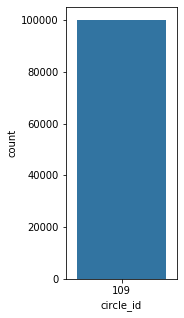

In [10]:
plt.figure(figsize=(2,5))
sns.countplot(telco['circle_id'])
plt.show()

Dropping this column since this does not contribute to the analysis. (has just one value throughout)

In [11]:
# Given the volume of datathat we are dealing with, the null values will need to be handled in iterations.
# The following function returns the null percentage in the data in the descending order
    


def null_pct(df):
    x = round((df.isnull().sum()/len(df.index) * 100),2).sort_values(ascending = False)
    return x

In [12]:
print(null_pct(telco))

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
                            ...  
last_day_rch_amt_6           0.00
last_day_rch_amt_7           0.00
last_day_rch_amt_8           0.00
last_day_rch_amt_9           0.00
mobile_number                0.00
Length: 226, dtype: float64


One may observe that the top value of null percentages is around 75%. hence it makes sense to handle null values by first checking for columns whose null value percentages are 70< and <80. 

In [13]:
# Defining a function that returns a list of all the columns which have null values in a specified range.



def check_null_columns(df,a,b):
    try:
        x = (df.isna().sum() * 100 / len(df)).sort_values(ascending=False)
        y = x[x.between(a,b)]
        y = str(y).split()
        col = y[::2][:-1]
        if len(col) ==1:
            return []
        return col
    except:
        print("error in the function, no tracebacking :)")

In [14]:
t1 = check_null_columns(telco,70,80)
print(t1)

['count_rech_2g_6', 'date_of_last_rech_data_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'max_rech_data_6', 'total_rech_data_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6', 'arpu_3g_7', 'count_rech_2g_7', 'fb_user_7', 'count_rech_3g_7', 'arpu_2g_7', 'av_rech_amt_data_7', 'max_rech_data_7', 'night_pck_user_7', 'total_rech_data_7', 'date_of_last_rech_data_7', 'night_pck_user_9', 'date_of_last_rech_data_9', 'fb_user_9', 'arpu_2g_9', 'max_rech_data_9', 'arpu_3g_9', 'total_rech_data_9', 'av_rech_amt_data_9', 'count_rech_3g_9', 'count_rech_2g_9', 'fb_user_8', 'av_rech_amt_data_8', 'count_rech_3g_8', 'count_rech_2g_8', 'date_of_last_rech_data_8', 'total_rech_data_8', 'max_rech_data_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8']


It is worth noting the the same columns for the months June, July, August and September are present in the above list. 

In [15]:
#defining a function to impute values in columns 

def impute_col(df,col,val):
    for (i,j) in zip(col,val):
        df[i] = df[i].fillna(j)
    return df


Data has to be inspected month wise, one column at a time. 

### June Data - Imputation

In [16]:
# looking at the number of 3g pack recharges in June
telco['count_rech_3g_6'].describe()

count    25153.000000
mean         0.599133
std          1.274428
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         29.000000
Name: count_rech_3g_6, dtype: float64

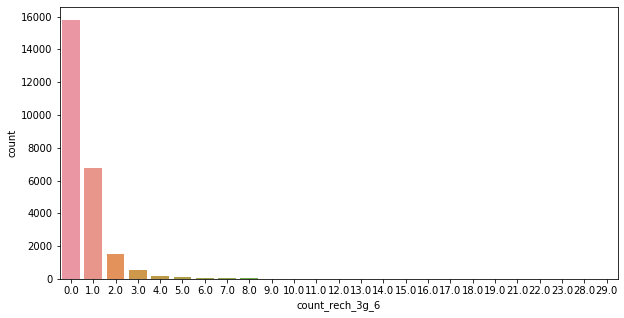

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(telco['count_rech_3g_6'])
plt.show()

It can be seen that the volume of 3g pack recharges are not significant in the month of June. It follows that null values in this column could be replaced with 0.

In [18]:
# Creating two lists to handle imputation in bulk - one stores the column name and the other stores the value we are going to use to impute the null value with.
col_imp = ['count_rech_3g_6']
val_imp = [0] 

In [19]:
# looking at the number of 2g recharges done in June

telco['count_rech_2g_6'].describe()

count    25153.000000
mean         1.864668
std          2.570254
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         42.000000
Name: count_rech_2g_6, dtype: float64

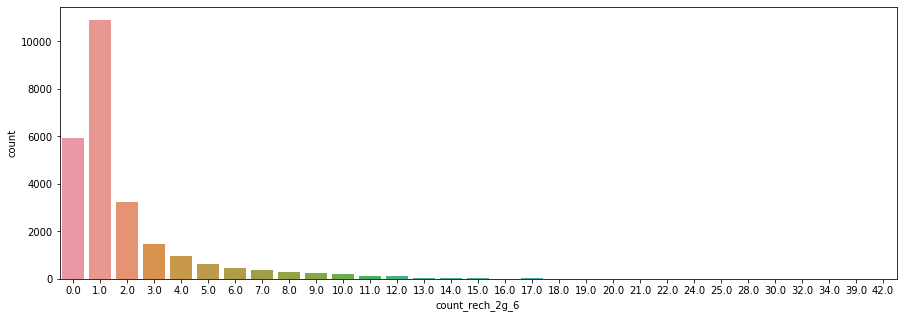

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(telco['count_rech_2g_6'])
plt.show()

It may be observed that not many subscribers did more than 5 2g pack recharges in June. Following the same procedure as we did for 3g pack recharge column,

In [21]:
col_imp.append('count_rech_2g_6')
val_imp.append(0)

In [22]:
# inspecting values in the date of last recharge for data in June

telco['date_of_last_rech_data_6'].value_counts()

6/30/2014    1888
6/29/2014    1651
6/28/2014    1643
6/26/2014    1384
6/27/2014    1333
6/25/2014    1108
6/24/2014    1067
6/22/2014     903
6/23/2014     893
6/21/2014     861
6/17/2014     859
6/19/2014     813
6/20/2014     779
6/18/2014     773
6/14/2014     739
6/16/2014     731
6/12/2014     660
6/15/2014     656
6/13/2014     631
6/11/2014     629
6/10/2014     626
6/9/2014      607
6/6/2014      591
6/5/2014      584
6/7/2014      517
6/8/2014      514
6/3/2014      495
6/4/2014      464
6/2/2014      423
6/1/2014      331
Name: date_of_last_rech_data_6, dtype: int64

Due to the insignifance of the date column in predicting the churn rate, date fields are dropped and stored in a temporary variable as shown below. 

In [23]:
for i in t1:
    if 'date' in i:
        print(i)


date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_9
date_of_last_rech_data_8


In [24]:
drop_col = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8', 'date_of_last_rech_data_9']

In [25]:
print(t1)

['count_rech_2g_6', 'date_of_last_rech_data_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'max_rech_data_6', 'total_rech_data_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6', 'arpu_3g_7', 'count_rech_2g_7', 'fb_user_7', 'count_rech_3g_7', 'arpu_2g_7', 'av_rech_amt_data_7', 'max_rech_data_7', 'night_pck_user_7', 'total_rech_data_7', 'date_of_last_rech_data_7', 'night_pck_user_9', 'date_of_last_rech_data_9', 'fb_user_9', 'arpu_2g_9', 'max_rech_data_9', 'arpu_3g_9', 'total_rech_data_9', 'av_rech_amt_data_9', 'count_rech_3g_9', 'count_rech_2g_9', 'fb_user_8', 'av_rech_amt_data_8', 'count_rech_3g_8', 'count_rech_2g_8', 'date_of_last_rech_data_8', 'total_rech_data_8', 'max_rech_data_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8']


In [26]:
telco['av_rech_amt_data_6'].describe()

count    25153.000000
mean       192.600982
std        192.646318
min          1.000000
25%         82.000000
50%        154.000000
75%        252.000000
max       7546.000000
Name: av_rech_amt_data_6, dtype: float64

In [27]:
print(telco[telco['av_rech_amt_data_6'].isna()]['vol_2g_mb_6'].value_counts())
print(telco[telco['av_rech_amt_data_6'].isna()]['vol_3g_mb_6'].value_counts())

0.0    74846
Name: vol_2g_mb_6, dtype: int64
0.0    74846
Name: vol_3g_mb_6, dtype: int64


When the average data recharge amount is null, 2g and 3g usage vlume is zero. 

In [28]:

col_imp.append('av_rech_amt_data_6')
val_imp.append(0)


In [29]:
telco['max_rech_data_6'].describe()

count    25153.000000
mean       126.393392
std        108.477235
min          1.000000
25%         25.000000
50%        145.000000
75%        177.000000
max       1555.000000
Name: max_rech_data_6, dtype: float64

In [30]:
# Dropping max_rech_data_6 due to it not contributing to our analysis greatly.
drop_col.append('max_rech_data_6')

In [31]:
telco['arpu_3g_6'].describe()

count    25153.000000
mean        89.555057
std        193.124653
min        -30.820000
25%          0.000000
50%          0.480000
75%        122.070000
max       6362.280000
Name: arpu_3g_6, dtype: float64

Due to the number of outliers in this column, imputing null values with median instead of mean to avoid corrupting our results

In [32]:
col_imp.append('arpu_3g_6')
val_imp.append(telco['arpu_3g_6'].median())

In [33]:
telco['total_rech_data_6'].describe()

count    25153.000000
mean         2.463802
std          2.789128
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         61.000000
Name: total_rech_data_6, dtype: float64

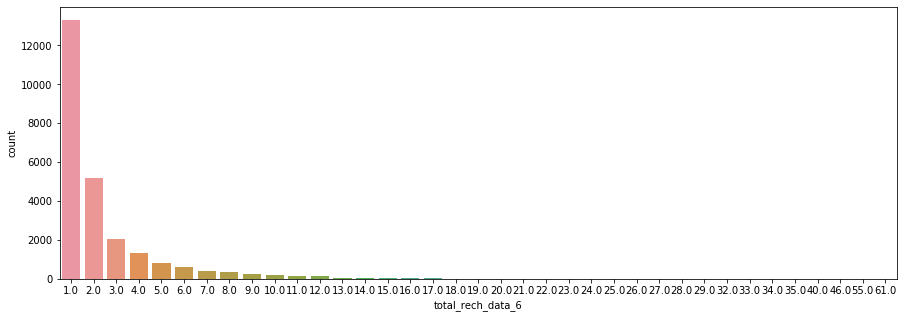

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(telco['total_rech_data_6'])
plt.show()

In [35]:
telco['arpu_2g_6'].describe()

count    25153.000000
mean        86.398003
std        172.767523
min        -35.830000
25%          0.000000
50%         10.830000
75%        122.070000
max       6433.760000
Name: arpu_2g_6, dtype: float64

Following the same rationale as column 'arpu_3g_6', imputing null values with median in thsi case too. 

In [36]:
col_imp.append('arpu_2g_6')
val_imp.append(telco['arpu_2g_6'].median())

In [37]:
telco['night_pck_user_6'].describe()

count    25153.000000
mean         0.025086
std          0.156391
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_6, dtype: float64

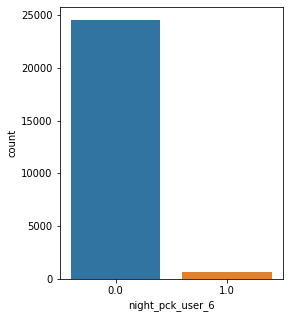

In [38]:
plt.figure(figsize=(4,5))
sns.countplot(telco['night_pck_user_6'])
plt.show()

Imputing null data with 0,

In [39]:
col_imp.append('night_pck_user_6')
val_imp.append(0)

In [40]:
telco['fb_user_6'].value_counts()

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

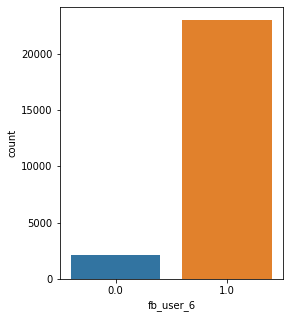

In [41]:
plt.figure(figsize=(4,5))
sns.countplot(telco['fb_user_6'])
plt.show()

Majority of the users utilize the services to gain access to social media. Make more sense to not draw conclusions by inspecting this column in isolaton.

In [42]:
print(telco[telco['fb_user_6'].isna()]['vol_2g_mb_6'].value_counts())
print(telco[telco['fb_user_6'].isna()]['vol_3g_mb_6'].value_counts())

0.0    74846
Name: vol_2g_mb_6, dtype: int64
0.0    74846
Name: vol_3g_mb_6, dtype: int64


In [43]:
# The column fb_user_6 will be imputed with zero in accordance with the results above

col_imp.append('fb_user_6')
val_imp.append(0)

### July Data - Following the same process as we did for June data. 

In [44]:
telco['count_rech_2g_7'].describe()

count    25571.000000
mean         2.044699
std          2.768332
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         48.000000
Name: count_rech_2g_7, dtype: float64

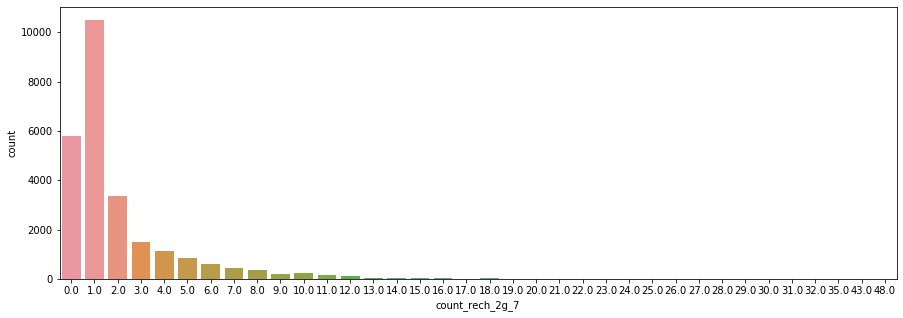

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(telco['count_rech_2g_7'])
plt.show()

The plot above depicts a similar trend as in June. 

In [46]:
col_imp.append('count_rech_2g_7')
val_imp.append(0)

In [47]:
telco['count_rech_3g_7'].describe()

count    25571.000000
mean         0.621720
std          1.394524
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         35.000000
Name: count_rech_3g_7, dtype: float64

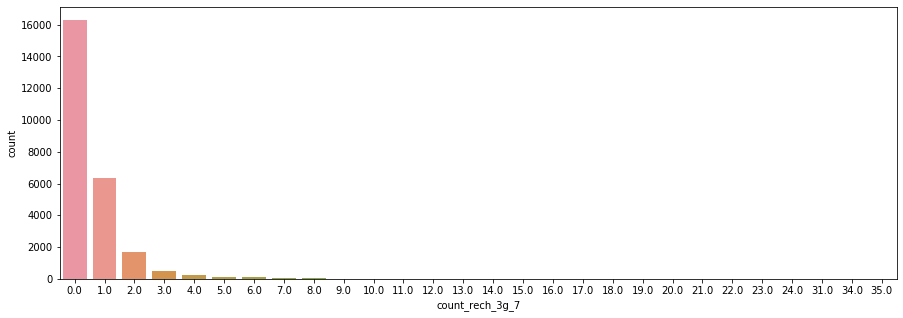

In [48]:
plt.figure(figsize=(15,5))
sns.countplot(telco['count_rech_3g_7'])
plt.show()

Not a significant number of recharges in July.

In [49]:
col_imp.append('count_rech_3g_7')
val_imp.append(0)

In [50]:
telco['av_rech_amt_data_7'].describe()

count    25571.000000
mean       200.981292
std        196.791224
min          0.500000
25%         92.000000
50%        154.000000
75%        252.000000
max       4365.000000
Name: av_rech_amt_data_7, dtype: float64

In [51]:
# Making better sense of av_rech_amt_data_7 by comparing it in tandem with vol_2g_mb_7 and vol_3g_mb_7

print(telco[telco['av_rech_amt_data_7'].isna()]['vol_2g_mb_7'].value_counts())
print(telco[telco['av_rech_amt_data_7'].isna()]['vol_3g_mb_7'].value_counts())

0.0    74428
Name: vol_2g_mb_7, dtype: int64
0.0    74428
Name: vol_3g_mb_7, dtype: int64


Imputing 'av_rech_amt_data_7' with 0 as the data recharge amount is null when the mobile internet usage of 2g and 3g data is 0.

In [52]:

col_imp.append('av_rech_amt_data_7')
val_imp.append(0)

In [53]:
telco['max_rech_data_7'].describe()

count    25571.000000
mean       126.729459
std        109.765267
min          1.000000
25%         25.000000
50%        145.000000
75%        177.000000
max       1555.000000
Name: max_rech_data_7, dtype: float64

In [54]:
# Dropping max_rech_data_7
drop_col.append('max_rech_data_7')

In [55]:
telco['total_rech_data_7'].describe()

count    25571.000000
mean         2.666419
std          3.031593
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         54.000000
Name: total_rech_data_7, dtype: float64

In [56]:
telco['arpu_3g_7'].describe()

count    25571.000000
mean        89.384120
std        195.893924
min        -26.040000
25%          0.000000
50%          0.420000
75%        119.560000
max       4980.900000
Name: arpu_3g_7, dtype: float64

In [57]:
# The null values in the column arpu_3g_7 needs to be imputed with it's median value.

col_imp.append('arpu_3g_7')
val_imp.append(telco['arpu_3g_7'].median())

In [58]:
telco['arpu_2g_7'].describe()

count    25571.000000
mean        85.914450
std        176.379871
min        -15.480000
25%          0.000000
50%          8.810000
75%        122.070000
max       4809.360000
Name: arpu_2g_7, dtype: float64

In [59]:
col_imp.append('arpu_2g_7')
val_imp.append(telco['arpu_2g_7'].median())

In [60]:
telco['night_pck_user_7'].describe()

count    25571.000000
mean         0.023034
std          0.150014
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_7, dtype: float64

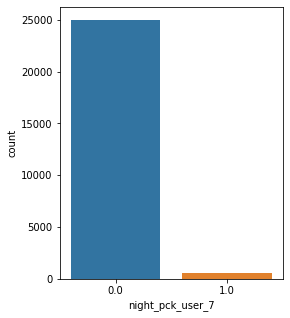

In [61]:
plt.figure(figsize=(4,5))
sns.countplot(telco['night_pck_user_7'])
plt.show()

In [62]:
col_imp.append('night_pck_user_7')
val_imp.append(0)

In [63]:
telco['fb_user_7'].value_counts()

1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64

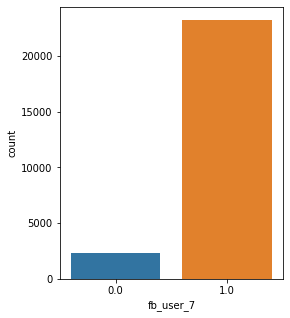

In [64]:
plt.figure(figsize=(4,5))
sns.countplot(telco['fb_user_7'])
plt.show()

Shows a similar pattern as fb_user_6, which leads us to inspecting fb_user_7, side by side with vol_2g_mb_7 and vol_3g_mb_7

In [65]:
print(telco[telco['fb_user_7'].isna()]['vol_2g_mb_7'].value_counts())
print(telco[telco['fb_user_7'].isna()]['vol_3g_mb_7'].value_counts())

0.0    74428
Name: vol_2g_mb_7, dtype: int64
0.0    74428
Name: vol_3g_mb_7, dtype: int64


In [66]:
# The null values in column fb_user_7 needs to be imputed with a 0 based on our operation in the previous cell.

col_imp.append('fb_user_7')
val_imp.append(0)

### August data - Following a smilar process as for June and July

In [67]:
telco['count_rech_2g_8'].describe()

count    26339.000000
mean         2.016288
std          2.720132
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         44.000000
Name: count_rech_2g_8, dtype: float64

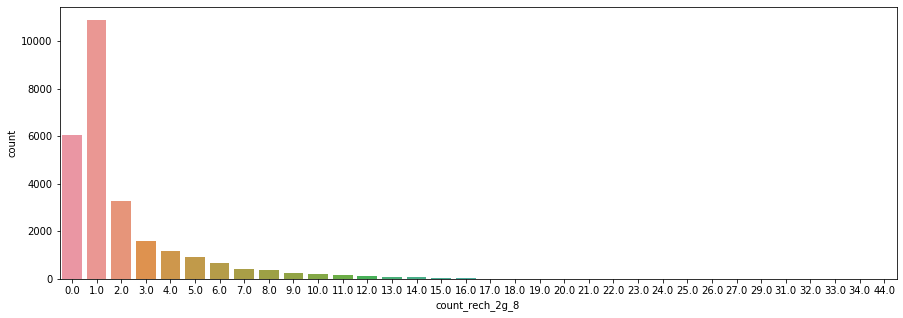

In [68]:
plt.figure(figsize=(15,5))
sns.countplot(telco['count_rech_2g_8'])
plt.show()

Just as in June and July, from the graph, it is evident that not a lot of customer did more than 5 recharges for 2g pack in August as well

A null in this coulmn could mean that no 2g recharge was done by the customer. Therefore, the nulls can be replaced by 0 as it was done for June and July.

In [69]:
col_imp.append('count_rech_2g_8')
val_imp.append(0)

In [70]:
telco['count_rech_3g_8'].describe()

count    26339.000000
mean         0.635711
std          1.422827
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         45.000000
Name: count_rech_3g_8, dtype: float64

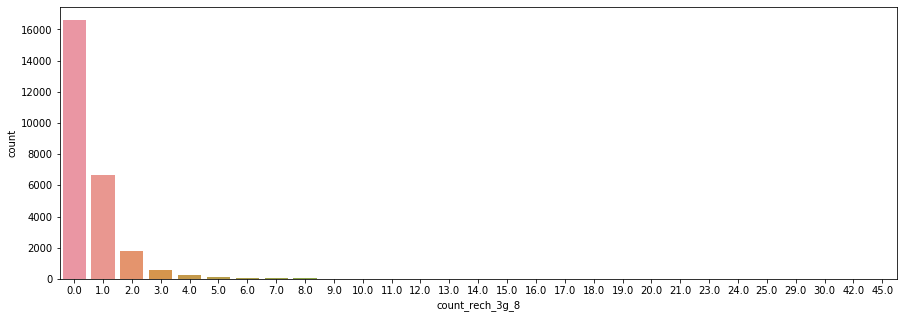

In [71]:
plt.figure(figsize=(15,5))
sns.countplot(telco['count_rech_3g_8'])
plt.show()

Continuing with the same approach we've taken till now, this column can be imputed with 0

In [72]:
col_imp.append('count_rech_3g_8')
val_imp.append(0)

In [73]:
telco['av_rech_amt_data_8'].describe()

count    26339.000000
mean       197.526489
std        191.301305
min          0.500000
25%         87.000000
50%        154.000000
75%        252.000000
max       4076.000000
Name: av_rech_amt_data_8, dtype: float64

In [74]:
print(telco[telco['av_rech_amt_data_8'].isna()]['vol_2g_mb_8'].value_counts())
print(telco[telco['av_rech_amt_data_8'].isna()]['vol_3g_mb_8'].value_counts())

0.0    73660
Name: vol_2g_mb_8, dtype: int64
0.0    73660
Name: vol_3g_mb_8, dtype: int64


In [75]:
col_imp.append('av_rech_amt_data_8')
val_imp.append(0)

In [76]:
telco['max_rech_data_8'].describe()

count    26339.000000
mean       125.717301
std        109.437851
min          1.000000
25%         25.000000
50%        145.000000
75%        179.000000
max       1555.000000
Name: max_rech_data_8, dtype: float64

In [77]:
drop_col.append('max_rech_data_8')

In [78]:
telco['total_rech_data_8'].describe()


count    26339.000000
mean         2.651999
std          3.074987
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         60.000000
Name: total_rech_data_8, dtype: float64

In [79]:
telco['arpu_3g_8'].describe()

count    26339.000000
mean        91.173849
std        188.180936
min        -24.490000
25%          0.000000
50%          0.880000
75%        122.070000
max       3716.900000
Name: arpu_3g_8, dtype: float64

In [80]:
# The null values in column arpu_3g_8 needs to be imputed with the median value.

col_imp.append('arpu_3g_8')
val_imp.append(telco['arpu_3g_8'].median())

In [81]:
telco['arpu_2g_8'].describe()

count    26339.000000
mean        86.599478
std        168.247852
min        -55.830000
25%          0.000000
50%          9.270000
75%        122.070000
max       3483.170000
Name: arpu_2g_8, dtype: float64

In [82]:
#imputing arpu_2g_8 with the median value as we did for arpu_3g_8
col_imp.append('arpu_2g_8')
val_imp.append(telco['arpu_2g_8'].median())

In [83]:
telco['night_pck_user_8'].describe()

count    26339.000000
mean         0.020844
std          0.142863
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_8, dtype: float64

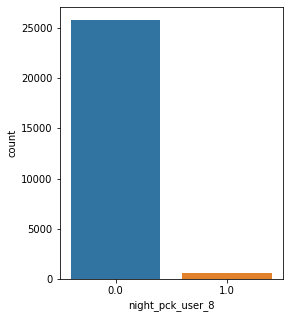

In [84]:
plt.figure(figsize=(4,5))
sns.countplot(telco['night_pck_user_8'])
plt.show()

Based on the plot above, it makes sense to impute this column with 0

In [85]:
col_imp.append('night_pck_user_8')
val_imp.append(telco['night_pck_user_8'].median())

In [86]:
telco['fb_user_8'].value_counts()

1.0    23463
0.0     2876
Name: fb_user_8, dtype: int64

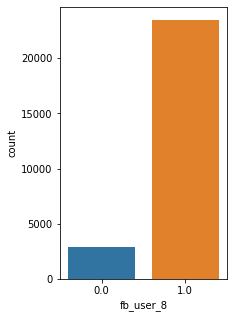

In [87]:
plt.figure(figsize=(3,5))
sns.countplot(telco['fb_user_8'])
plt.show()

Shows a similar trend as in previous months - users utilize services to avail access to social media. Therefore, this column has to be inspected in relation with other columns.

In [88]:
print(telco[telco['fb_user_8'].isna()]['vol_2g_mb_8'].value_counts())
print(telco[telco['fb_user_8'].isna()]['vol_3g_mb_8'].value_counts())

0.0    73660
Name: vol_2g_mb_8, dtype: int64
0.0    73660
Name: vol_3g_mb_8, dtype: int64


In [89]:
# imputing the column fb_user_8 with zero.
col_imp.append('fb_user_8')
val_imp.append(0)

### September data - the imputation would be carried out as it was done for the past months. 

In [90]:
telco['count_rech_2g_9'].describe()

count    25922.000000
mean         1.781807
std          2.214701
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         40.000000
Name: count_rech_2g_9, dtype: float64

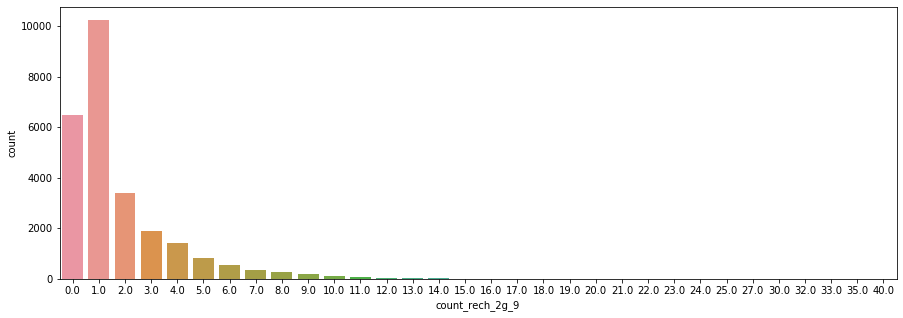

In [91]:
plt.figure(figsize=(15,5))
sns.countplot(telco['count_rech_2g_9'])
plt.show()

Just like in June, July and August, it is evident that not a lot of customer did more than 5 recharges for 2g pack in September.

Therefore, the nulls can be replaced by 0 as we did for June, July and August.

In [92]:
col_imp.append('count_rech_2g_9')
val_imp.append(0)

In [93]:
telco['count_rech_3g_9'].describe()

count    25922.000000
mean         0.659363
std          1.411513
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         49.000000
Name: count_rech_3g_9, dtype: float64

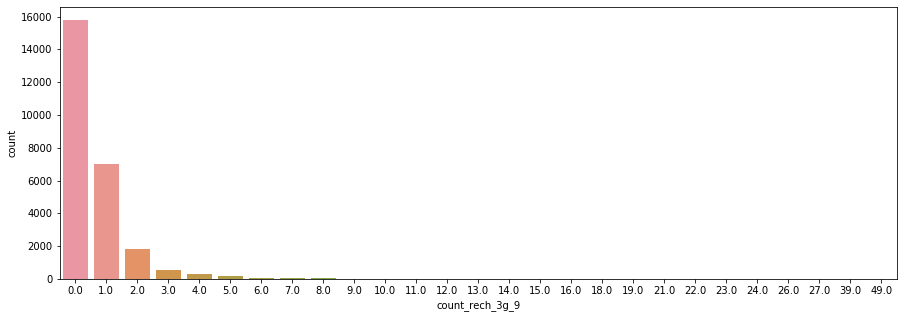

In [94]:
plt.figure(figsize=(15,5))
sns.countplot(telco['count_rech_3g_9'])
plt.show()

In [95]:
#Null values to be imputed with zero as not a lot of people recharged for 3g packs in September. 

col_imp.append('count_rech_3g_9')
val_imp.append(0)

In [96]:
telco['av_rech_amt_data_9'].describe()

count    25922.000000
mean       192.734315
std        188.400286
min          1.000000
25%         69.000000
50%        164.000000
75%        252.000000
max       4061.000000
Name: av_rech_amt_data_9, dtype: float64

In [97]:
print(telco[telco['av_rech_amt_data_9'].isna()]['vol_2g_mb_9'].value_counts())
print(telco[telco['av_rech_amt_data_9'].isna()]['vol_3g_mb_9'].value_counts())

0.0    74077
Name: vol_2g_mb_9, dtype: int64
0.0    74077
Name: vol_3g_mb_9, dtype: int64


In [98]:
col_imp.append('av_rech_amt_data_9')
val_imp.append(0)

In [99]:
telco['max_rech_data_9'].describe()

count    25922.00000
mean       124.94144
std        111.36376
min          1.00000
25%         25.00000
50%        145.00000
75%        179.00000
max       1555.00000
Name: max_rech_data_9, dtype: float64

In [100]:
# dropping max_rech_data_9 as we did for previous months and it adds scarce (if any) value to our analysis
drop_col.append('max_rech_data_9')

In [101]:
telco['total_rech_data_9'].describe()

count    25922.000000
mean         2.441170
std          2.516339
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         84.000000
Name: total_rech_data_9, dtype: float64

In [102]:
telco['arpu_3g_9'].describe()

count    25922.000000
mean       100.264116
std        216.291992
min        -71.090000
25%          0.000000
50%          2.605000
75%        140.010000
max      13884.310000
Name: arpu_3g_9, dtype: float64

In [103]:
col_imp.append('arpu_3g_9')
val_imp.append(telco['arpu_3g_9'].median())

In [104]:
telco['arpu_2g_9'].describe()

count    25922.000000
mean        93.712026
std        171.384224
min        -45.740000
25%          0.000000
50%         14.800000
75%        140.010000
max       3467.170000
Name: arpu_2g_9, dtype: float64

In [105]:
col_imp.append('arpu_2g_9')
val_imp.append(telco['arpu_2g_9'].median())

In [106]:
telco['night_pck_user_9'].describe()

count    25922.000000
mean         0.015971
std          0.125366
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: night_pck_user_9, dtype: float64

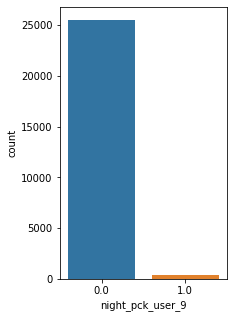

In [107]:
plt.figure(figsize=(3,5))
sns.countplot(telco['night_pck_user_9'])
plt.show()

In [108]:
col_imp.append('night_pck_user_9')
val_imp.append(telco['night_pck_user_9'].median())

In [109]:
telco['fb_user_9'].value_counts()

1.0    22318
0.0     3604
Name: fb_user_9, dtype: int64

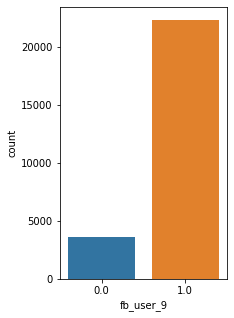

In [110]:
plt.figure(figsize=(3,5))
sns.countplot(telco['fb_user_9'])
plt.show()

In [111]:
print(telco[telco['fb_user_9'].isna()]['vol_2g_mb_9'].value_counts())
print(telco[telco['fb_user_9'].isna()]['vol_3g_mb_9'].value_counts())

0.0    74077
Name: vol_2g_mb_9, dtype: int64
0.0    74077
Name: vol_3g_mb_9, dtype: int64


In [112]:
col_imp.append('fb_user_9')
val_imp.append(0)

In [113]:
#making a copy just in case
telco_copy = telco.copy(deep=True)

In [114]:
telco = impute_col(telco,col_imp, val_imp)

In [115]:
#Inputting NA fields in Total Data Recharge column with the sum of 3g and 2g recharge counts.

telco['total_rech_data_6'].fillna((telco['count_rech_3g_6'] + telco['count_rech_2g_6']), inplace = True)
telco['total_rech_data_7'].fillna((telco['count_rech_3g_7'] + telco['count_rech_2g_7']), inplace = True)
telco['total_rech_data_8'].fillna((telco['count_rech_3g_8'] + telco['count_rech_2g_8']), inplace = True)
telco['total_rech_data_9'].fillna((telco['count_rech_3g_9'] + telco['count_rech_2g_9']), inplace = True)

In [116]:
#checking for column with null values 70< and <80

print(sorted(check_null_columns(telco,70,80)))

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']


In [117]:
print(sorted(list(drop_col)))

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']


In [118]:
telco = telco.drop(drop_col, axis = 1)

In [119]:
print(check_null_columns(telco,70,80))

[]


In [120]:
print(null_pct(telco))

std_ic_t2m_mou_9     7.75
std_og_mou_9         7.75
loc_og_t2t_mou_9     7.75
loc_og_t2m_mou_9     7.75
loc_og_t2f_mou_9     7.75
                     ... 
total_rech_data_9    0.00
total_rech_data_8    0.00
total_rech_data_7    0.00
total_rech_data_6    0.00
mobile_number        0.00
Length: 218, dtype: float64


It can be seen here that the maximum null value pecentage in any column is 7.75

In [121]:
print(col_imp)

['count_rech_3g_6', 'count_rech_2g_6', 'av_rech_amt_data_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'fb_user_6', 'count_rech_2g_7', 'count_rech_3g_7', 'av_rech_amt_data_7', 'arpu_3g_7', 'arpu_2g_7', 'night_pck_user_7', 'fb_user_7', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8', 'fb_user_8', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'fb_user_9']


In [122]:
# checking for columns with null values 7< and <10

t1 = check_null_columns(telco,7,10)
print(sorted(t1))

['ic_others_9', 'isd_ic_mou_9', 'isd_og_mou_9', 'loc_ic_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2t_mou_9', 'offnet_mou_9', 'og_others_9', 'onnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'spl_ic_mou_9', 'spl_og_mou_9', 'std_ic_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2o_mou_9', 'std_ic_t2t_mou_9', 'std_og_mou_9', 'std_og_t2c_mou_9', 'std_og_t2f_mou_9', 'std_og_t2m_mou_9', 'std_og_t2t_mou_9']


In [123]:
#Dropping these columns as they are inconsequential to finding High Value Customers (HVC) as per the problem statement
telco = telco.drop(t1, axis = 1)

In [124]:
print(null_pct(telco))

std_ic_mou_8         5.38
spl_og_mou_8         5.38
loc_og_t2m_mou_8     5.38
loc_og_t2f_mou_8     5.38
loc_og_t2c_mou_8     5.38
                     ... 
count_rech_2g_7      0.00
count_rech_2g_6      0.00
total_rech_data_9    0.00
total_rech_data_8    0.00
mobile_number        0.00
Length: 189, dtype: float64


In [125]:
print(list(telco.columns))

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_

In [126]:
#checking fro columns iwth null value percentage between 4 and 6, as we have done for the range 7-10

t1 = check_null_columns(telco,4,6)
print(sorted(t1))

['date_of_last_rech_9', 'ic_others_8', 'isd_ic_mou_8', 'isd_og_mou_8', 'loc_ic_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_mou_8', 'loc_og_t2c_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2t_mou_8', 'offnet_mou_8', 'og_others_8', 'onnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'spl_ic_mou_8', 'spl_og_mou_8', 'std_ic_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2o_mou_8', 'std_ic_t2t_mou_8', 'std_og_mou_8', 'std_og_t2c_mou_8', 'std_og_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_t2t_mou_8']


In [127]:
#checking for outliers in the above

telco[t1].describe()

,std_ic_mou_8,spl_og_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8,...,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2o_mou_8,std_ic_t2f_mou_8,std_ic_t2m_mou_8,loc_og_t2t_mou_8,std_ic_t2t_mou_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8
count,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.0,...,94621.000000,94621.000000,94621.0,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000
mean,33.154735,5.053769,91.755128,3.677991,1.433821,141.328209,83.282673,89.838390,1.067792,0.0,...,11.751834,167.432575,0.0,2.085004,21.183211,45.887806,9.883921,133.018098,196.574803,7.292981
std,110.127008,17.855111,156.537048,13.270996,6.783335,245.914311,265.486090,271.757783,7.905971,0.0,...,39.125379,250.025523,0.0,15.812580,83.683565,151.184830,55.073186,308.951589,327.170662,68.402466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.000000,9.810000,0.000000,0.000000,17.110000,0.000000,0.000000,0.000000,0.0,...,0.000000,32.740000,0.0,0.000000,0.000000,1.600000,0.000000,6.460000,31.630000,0.000000
50%,5.880000,0.000000,40.360000,0.000000,0.000000,63.730000,0.000000,3.310000,0.000000,0.0,...,0.930000,93.830000,0.0,0.000000,2.030000,11.730000,0.000000,32.360000,92.140000,0.000000
75%,27.710000,3.990000,109.090000,2.040000,0.000000,166.110000,30.580000,52.490000,0.000000,0.0,...,8.110000,207.280000,0.0,0.000000,15.360000,40.110000,4.080000,115.860000,228.260000,0.000000
max,5957.140000,1390.880000,4961.330000,928.490000,502.090000,11039.910000,8014.430000,13950.040000,516.910000,0.0,...,2433.060000,10830.160000,0.0,1394.890000,5645.860000,10752.560000,4309.290000,10752.560000,14007.340000,13095.360000


As one may observe, almost every column has outliers, therefore imputing null values with median.

In [128]:
col_imp=[]
val_imp=[]
col_imp.extend(['ic_others_8', 'isd_ic_mou_8', 'isd_og_mou_8', 'loc_ic_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_t2m_mou_8', 
                'loc_ic_t2t_mou_8', 'loc_og_mou_8', 'loc_og_t2c_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_8', 
                'loc_og_t2t_mou_8', 'offnet_mou_8', 'og_others_8', 'onnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'spl_ic_mou_8', 'spl_og_mou_8', 'std_ic_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2o_mou_8', 
                'std_ic_t2t_mou_8', 'std_og_mou_8', 'std_og_t2c_mou_8', 'std_og_t2f_mou_8', 'std_og_t2m_mou_8', 
                'std_og_t2t_mou_8'])

### Creating a list and imputing

In [129]:
for i in col_imp:
    if "_9" in i:
        continue
    val_imp.append(telco[i].median())

In [130]:
telco = impute_col(telco,col_imp, val_imp)

In [131]:
t1 = check_null_columns(telco, 4, 6)
print(t1)

[]


In [132]:
t1 = check_null_columns(telco, 3, 4)
print(t1)

['roam_og_mou_6', 'og_others_6', 'loc_og_t2m_mou_6', 'loc_ic_t2t_mou_6', 'loc_og_t2c_mou_6', 'loc_og_t2t_mou_6', 'loc_ic_t2m_mou_6', 'spl_og_mou_6', 'std_og_t2f_mou_6', 'loc_ic_t2f_mou_6', 'roam_ic_mou_6', 'loc_og_mou_6', 'ic_others_6', 'offnet_mou_6', 'loc_ic_mou_6', 'isd_og_mou_6', 'onnet_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2c_mou_6', 'std_og_t2m_mou_6', 'std_ic_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2m_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'spl_ic_mou_6', 'std_og_t2t_mou_6', 'isd_ic_mou_6', 'loc_og_t2f_mou_6', 'isd_og_mou_7', 'std_og_mou_7', 'spl_og_mou_7', 'std_og_t2c_mou_7', 'og_others_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'ic_others_7', 'isd_ic_mou_7', 'loc_ic_mou_7', 'spl_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_og_t2f_mou_7', 'std_ic_t2f_mou_7', 'roam_ic_mou_7', 'loc_og_t2f_mou_7', 'std_og_t2m_mou_7', 'offnet_mou_7', 'roam_og_mou_7', 'std_og_t2t_mou_7', 'onnet_mou_7', 'loc_og_t2t_mou_7', 'loc_og_m

In [133]:
telco[t1].describe()

,roam_og_mou_6,og_others_6,loc_og_t2m_mou_6,loc_ic_t2t_mou_6,loc_og_t2c_mou_6,loc_og_t2t_mou_6,loc_ic_t2m_mou_6,spl_og_mou_6,std_og_t2f_mou_6,loc_ic_t2f_mou_6,...,loc_og_t2f_mou_7,std_og_t2m_mou_7,offnet_mou_7,roam_og_mou_7,std_og_t2t_mou_7,onnet_mou_7,loc_og_t2t_mou_7,loc_og_mou_7,loc_og_t2c_mou_7,loc_og_t2m_mou_7
count,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,...,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000
mean,13.911337,0.454157,93.342088,47.922365,1.123056,47.100763,107.475650,3.916811,1.129011,12.084305,...,3.792985,90.804137,197.045133,9.818732,83.299598,133.670805,46.473010,141.670476,1.368500,91.397131
std,71.443196,4.125911,162.780544,140.258485,5.448946,150.856393,171.713903,14.936449,7.984970,40.140895,...,14.264986,269.347911,325.862803,58.455762,263.631042,308.794148,155.318705,248.731086,7.533445,157.492308
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,9.880000,2.990000,0.000000,1.660000,17.290000,0.000000,0.000000,0.000000,...,0.000000,0.000000,32.190000,0.000000,0.000000,6.660000,1.630000,17.480000,0.000000,10.025000
50%,0.000000,0.000000,41.030000,15.690000,0.000000,11.910000,56.490000,0.000000,0.000000,0.880000,...,0.000000,3.635000,91.735000,0.000000,0.000000,32.330000,11.610000,63.685000,0.000000,40.430000
75%,0.000000,0.000000,110.390000,46.840000,0.000000,40.960000,132.387500,2.430000,0.000000,8.140000,...,2.090000,54.040000,226.815000,0.000000,31.132500,115.595000,39.910000,164.382500,0.000000,107.560000
max,3775.110000,800.890000,4729.740000,6626.930000,342.860000,6431.330000,4693.860000,1023.210000,628.560000,1872.340000,...,1196.430000,9284.740000,9667.130000,2812.040000,8133.660000,8157.780000,7400.660000,7674.780000,916.240000,4557.140000


In [134]:
# Following the same process as we did previously for imputation as these columns, too, have outliers.

col_imp=[]
val_imp=[]
col_imp.extend(['loc_ic_t2f_mou_6', 'std_og_t2c_mou_6', 'roam_og_mou_6', 'std_og_mou_6', 'std_ic_t2m_mou_6', 'loc_og_t2t_mou_6',
                'std_ic_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'roam_ic_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2f_mou_6',
                'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2t_mou_6', 'std_ic_t2o_mou_6', 
                'std_og_t2t_mou_6', 'isd_og_mou_6', 'isd_ic_mou_6', 'spl_ic_mou_6', 'offnet_mou_6', 'std_ic_t2t_mou_6', 
                'spl_og_mou_6', 'onnet_mou_6', 'loc_ic_t2m_mou_6', 'og_others_6', 'loc_ic_mou_6', 'ic_others_6', 'spl_ic_mou_7',
                'std_og_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_og_t2f_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'std_ic_mou_7', 
                'spl_og_mou_7', 'std_og_t2c_mou_7', 'isd_og_mou_7', 'std_og_mou_7', 'std_ic_t2f_mou_7', 'std_og_t2t_mou_7', 
                'std_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_mou_7', 'onnet_mou_7', 'offnet_mou_7', 
                'std_ic_t2t_mou_7', 'loc_og_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'roam_ic_mou_7', 'og_others_7', 
                'loc_ic_t2t_mou_7', 'loc_og_t2c_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7'])



In [135]:
for i in col_imp:
    if "_9" in i:
        continue
    val_imp.append(telco[i].median())

In [136]:
telco = impute_col(telco,col_imp, val_imp)

In [137]:
t1 = check_null_columns(telco, 3, 4)
print(t1)

[]


In [138]:
t1 = check_null_columns(telco, 0.1, 3)
print(t1)

['date_of_last_rech_7', 'last_date_of_month_9', 'date_of_last_rech_6', 'last_date_of_month_8', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_7']


In [139]:
#Leaving out date columns
val_imp=[]
col_imp=['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']

In [140]:
for i in col_imp:
    if "_9" in i:
        continue
    val_imp.append(telco[i].median())

In [141]:
telco = impute_col(telco,col_imp, val_imp)

In [142]:
print(null_pct(telco))

date_of_last_rech_9     4.76
date_of_last_rech_8     3.62
date_of_last_rech_7     1.77
last_date_of_month_9    1.66
date_of_last_rech_6     1.61
                        ... 
last_day_rch_amt_6      0.00
max_rech_amt_9          0.00
max_rech_amt_8          0.00
max_rech_amt_7          0.00
mobile_number           0.00
Length: 189, dtype: float64


In [143]:
#Dropping Date Columns
telco = telco.drop(['date_of_last_rech_9', 'date_of_last_rech_8', 'date_of_last_rech_7', 'last_date_of_month_9', 
                         'date_of_last_rech_6', 'last_date_of_month_8', 'last_date_of_month_7'], axis = 1)

In [144]:
print(null_pct(telco))

vbc_3g_9              0.0
loc_ic_t2t_mou_8      0.0
loc_ic_t2t_mou_6      0.0
total_og_mou_9        0.0
total_og_mou_8        0.0
                     ... 
last_day_rch_amt_8    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_6    0.0
max_rech_amt_9        0.0
mobile_number         0.0
Length: 182, dtype: float64


### Filter high-value customers

Problem Statement - "As mentioned above, you need to predict churn only for high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)."

In [145]:
telco['rech_amt_avg_6_7'] = (telco['total_rech_amt_6'] + telco['total_rech_amt_7'])/2
telco[['total_rech_amt_6', 'total_rech_amt_7', 'rech_amt_avg_6_7']].head(10)

,total_rech_amt_6,total_rech_amt_7,rech_amt_avg_6_7
0,362,252,307.0
1,74,384,229.0
2,168,315,241.5
3,230,310,270.0
4,196,350,273.0
5,120,0,60.0
6,499,222,360.5
7,1580,790,1185.0
8,437,601,519.0
9,220,195,207.5


In [146]:
temp = telco['rech_amt_avg_6_7'].quantile(0.70)
telco_HVC = telco[telco['rech_amt_avg_6_7'] > temp ]
telco_HVC.shape

(29979, 183)

### Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9

In [147]:
telco_HVC['temp_col'] = (telco_HVC['total_ic_mou_9'] + telco_HVC['total_og_mou_9'] + telco_HVC['vol_2g_mb_9'] + telco_HVC['vol_3g_mb_9'])
telco_HVC['churn'] = telco_HVC['temp_col'].apply(lambda x: 1 if x == 0 else 0 )
telco_HVC = telco_HVC.drop('temp_col', axis = 1)

In [148]:
telco_HVC['churn'].head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

## BiVariate Analysis on the HVC Data Set

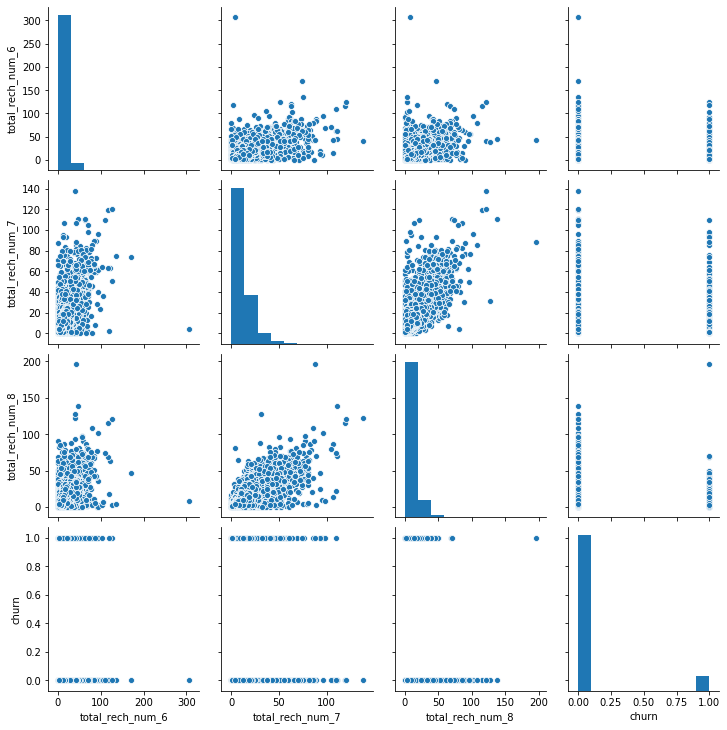

In [149]:
t1 = telco_HVC[['total_rech_num_6','total_rech_num_7', 'total_rech_num_8', 'churn']]
sns.pairplot(t1)
plt.show()

* Conventional sense says that the more a person recharges, the less likely they are switch service providers. However, the plots above don't seem to give a clear indication of that. It is possibe that other factors too are at play.




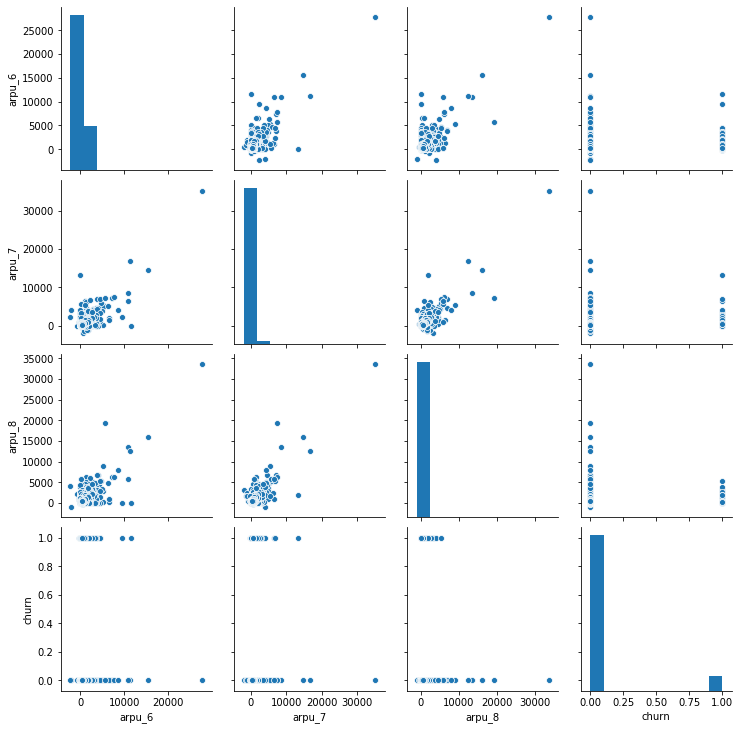

In [150]:
t1 = telco_HVC[['arpu_6','arpu_7', 'arpu_8', 'churn']]
sns.pairplot(t1)
plt.show()

* One would expect a customer to not churn if the contribute more towards the revenue of the telco. If such is the case, the plots above fail to explain why some customers who do not contribute as much revenue as some other, stick to their current service provider. 
* One possible explanation is that perhaps they are not heavy users of mobile services and use it very sparingly. Therefore, the good and bad aspects (pros and cons) of the telco are very diminished for these users for whom these services are very utilitarian.  

In [151]:
#dropping coluns belonging to the month of September

drop_9_columns = telco.filter(regex='_9')
print(telco.drop(list(drop_9_columns.columns),axis=1,inplace=True))

None


In [152]:
drop_9_columns.columns

Index(['arpu_9', 'total_og_mou_9', 'total_ic_mou_9', 'total_rech_num_9',
       'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9',
       'total_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9',
       'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9',
       'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9'],
      dtype='object')

### Deriving New Features

In [153]:
# New columns containing difference of the avg values in "good phase" and values in "action phase"

telco_HVC['avg_rech_amt_diff'] = (telco['total_rech_amt_6'] + telco_HVC['total_rech_amt_7'])/2 - telco['total_rech_amt_8']
telco_HVC['avg_rech_num_diff'] = (telco['total_rech_num_6'] + telco_HVC['total_rech_num_7'])/2 - telco['total_rech_num_8']
telco_HVC['avg_og_mou_diff'] = (telco['total_og_mou_6'] + telco_HVC['total_og_mou_7'])/2 - telco['total_og_mou_8']
telco_HVC['max_rech_amt_diff'] = (telco_HVC['max_rech_amt_6']+telco_HVC['max_rech_amt_7'])/2 - telco_HVC['max_rech_amt_8']
telco_HVC['avg_vbc_3g_diff'] = (telco_HVC['vbc_3g_6']+telco_HVC['vbc_3g_7'])/2 - telco_HVC['vbc_3g_8']



In [154]:
#To check if age plays a factor in the loyalty
telco_HVC['loyalty_temp'] = round(telco_HVC['aon']/365)

In [155]:
telco_HVC['loyalty_temp'].head(10)

7     2.0
8     1.0
13    7.0
16    1.0
17    2.0
21    2.0
24    8.0
33    4.0
38    3.0
41    6.0
Name: loyalty_temp, dtype: float64

In [156]:
#Placing existing data into buckets as per degree of loyalty

bins = [0,4,8,13]
labels = ['not loyal','loyal','very loyal']
telco_HVC['loyalty'] = pd.cut(telco_HVC['loyalty_temp'], bins=bins, labels=labels)

In [157]:
telco_HVC['loyalty'].value_counts()

not loyal     21114
loyal          6873
very loyal     1903
Name: loyalty, dtype: int64

In [158]:
print("\nNon-churned customers")
print(telco_HVC[telco_HVC['churn']==0]['loyalty'].value_counts())
print("\nChurned customers")
print(telco_HVC[telco_HVC['churn']==1]['loyalty'].value_counts())


Non-churned customers
not loyal     18877
loyal          6603
very loyal     1843
Name: loyalty, dtype: int64

Churned customers
not loyal     2237
loyal          270
very loyal      60
Name: loyalty, dtype: int64


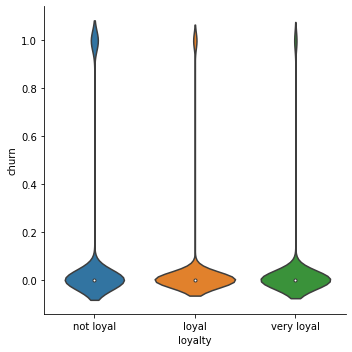

In [159]:
sns.catplot(x = "loyalty", y ="churn",kind = "violin", data=telco_HVC)
plt.show()

It can be seen that 'Very Loyal' customers have very less churn and 'Not Loyal' customers churn a lot.

In [160]:
drop_9_columns = telco_HVC.filter(regex='_9')
print(telco_HVC.drop(list(drop_9_columns.columns),axis=1,inplace=True))

drop_9_columns = telco_HVC.filter(regex='last_date_of_month')
print(telco_HVC.drop(list(drop_9_columns.columns),axis=1,inplace=True))
telco_HVC.head()

None
None


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,vbc_3g_6,rech_amt_avg_6_7,churn,avg_rech_amt_diff,avg_rech_num_diff,avg_og_mou_diff,max_rech_amt_diff,avg_vbc_3g_diff,loyalty_temp,loyalty
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,...,18.74,1185.0,1,-2453.0,-2.0,198.225,-395.0,-38.680,2.0,not loyal
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,122.16,519.0,0,399.0,6.0,298.450,92.0,495.375,1.0,not loyal
13,7002191713,109,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,...,0.00,380.0,0,-337.0,-6.0,-465.510,-20.0,0.000,7.0,loyal
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,21.89,459.0,0,299.0,6.0,83.030,-20.0,12.170,1.0,not loyal
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,...,0.00,408.0,0,378.0,6.5,625.170,25.0,0.000,2.0,not loyal


In [161]:
t_dummies_df = pd.get_dummies(telco_HVC['loyalty'], drop_first = True)

telco_HVC = pd.concat([telco_HVC, t_dummies_df], axis = 1)
telco_HVC = telco_HVC.drop(['loyalty', 'loyalty_temp'], axis = 1)
telco_HVC.shape

(29979, 168)

## Treating Outliers

In [162]:
def remove_outliers(df,col):
    for i in col:
        Q1 = df[i].quantile(0.05)
        Q3 = df[i].quantile(0.995)
        df = df[(df[i] >=Q1) &(df[i] <=Q3)]
    return df

In [163]:
df_no_outlier = remove_outliers(telco_HVC, list(telco_HVC.columns))
df_no_outlier.shape

(1255, 168)

## Handling Imbalance in Data

In [164]:
df_train, df_test = train_test_split(telco_HVC, test_size=0.2, random_state = 100)

In [165]:
telco_HVC['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [166]:
imb = round((telco_HVC['churn'] == 1).sum()/len(telco_HVC) * 100,2)
imb

8.64

Because of the 8.64 percent churn in the dataset, the results from this would be highly skewed owing to its imbalance.

Such class imbalance can be handled by creating synthetic records of the minor class for churn = 1. 

In [167]:
# Separate majority and minority classes
t_majority = df_train[df_train.churn==0]
t_minority = df_train[df_train.churn==1]
 
# Upsample minority class
t_minority_upsampled = resample(t_minority, 
                                 replace=True,     
                                 n_samples=len(t_majority),    
                                 random_state=123) 
 
# Combine majority class with upsampled minority class
t_upsampled = pd.concat([t_majority, t_minority_upsampled])
 
# New class counts
t_upsampled.churn.value_counts()

1    21951
0    21951
Name: churn, dtype: int64

In [168]:
df_train = t_upsampled.copy(deep = True)
y_train = df_train.pop('churn')
y_ind = df_train.pop('mobile_number')
X_train = df_train.copy(deep=True)

In [169]:
y_test = df_test.pop('churn')
y_test_ind = df_test.pop('mobile_number')
X_test = df_test.copy(deep = True)

In [170]:
X_train_c = X_train.copy(deep = True)
X_test_c = X_test.copy(deep = True)
y_train_c = y_train.copy(deep = True)
y_test_c = y_test.copy(deep = True)

In [171]:
scaler = StandardScaler() 
  
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

## Logistic Regression

In [172]:
X_train = X_train_c.copy(deep = True)
X_test = X_test_c.copy(deep = True)
y_train = y_train_c.copy(deep = True)
y_test = y_test_c.copy(deep = True)

In [173]:
scaler = StandardScaler() 

cols = X_train.columns
X_train[cols] = scaler.fit_transform(X_train[cols]) 
X_test[cols] = scaler.transform(X_test[cols]) 

In [174]:
# Logistic Regression
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43902
Model:                            GLM   Df Residuals:                    43760
Model Family:                Binomial   Df Model:                          141
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 05 Apr 2021   Deviance:                          inf
Time:                        21:54:50   Pearson chi2:                 1.35e+16
No. Iterations:                    63                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0268      0.019      1.412      0.158      -0.010       0.064
circle_id           1.262e-07   3.42e-08      3.690      0.000    5.92e-08    1.93e-07
loc_og_t2o_mou      2.418e-07   4.92e-08      4.915      0.000    1.45e-07    3.38e-07
std_og_t2o_mou      4.006e-08   4.13e-08      0.969      0.332   -4.09e-08    1.21e-07
loc_ic_t2o_mou     -1.485e-07   2.88e-08     -5.147      0.000   -2.05e-07   -9.19e-08
arpu_6                -0.1051      0.065     -1.607      0.108      -0.233       0.023
arpu_7                 0.4221      0.066      6.353      0.000       0.292       0.552
arpu_8                 0.6975      0.072      9.658      0.000       0.556       0.839
onnet_mou_6           -2.3495      1.482     -1.586      0.113      -5.254       0.555
onnet_mou_7           -5.2257      1.062     -4.918      0.000      -7.308      -3.143
onnet_mou_8           -2.6156      0.985     -2.655      0.008      -4.546      -0.685
offnet_mou_6          -2.3051      1.522     -1.514      0.130      -5.288       0.678
offnet_mou_7          -5.3848      1.069     -5.039      0.000      -7.479      -3.290
offnet_mou_8          -3.5211      1.001     -3.517      0.000      -5.483      -1.559
roam_ic_mou_6          0.0689      0.029      2.371      0.018       0.012       0.126
roam_ic_mou_7          0.1384      0.037      3.756      0.000       0.066       0.211
roam_ic_mou_8         -0.0764      0.028     -2.693      0.007      -0.132      -0.021
roam_og_mou_6          0.7034      0.428      1.644      0.100      -0.135       1.542
roam_og_mou_7          1.3339      0.255      5.233      0.000       0.834       1.834
roam_og_mou_8          1.1166      0.319      3.501      0.000       0.491       1.742
loc_og_t2t_mou_6    1757.8697    599.561      2.932      0.003     582.751    2932.988
loc_og_t2t_mou_7    -894.6263    532.456     -1.680      0.093   -1938.221     148.968
loc_og_t2t_mou_8    4798.3982    488.658      9.820      0.000    3840.645    5756.151
loc_og_t2m_mou_6    1751.3837    597.445      2.931      0.003     580.413    2922.354
loc_og_t2m_mou_7    -936.4051    557.169     -1.681      0.093   -2028.435     155.625
loc_og_t2m_mou_8    5024.6842    511.638      9.821      0.000    4021.892    6027.476
loc_og_t2f_mou_6     127.7118     43.564      2.932      0.003      42.327     213.096
loc_og_t2f_mou_7     -75.9599     45.209     -1.680      0.093    -164.568      12.649
loc_og_t2f_mou_8     412.5933     42.017      9.820      0.000     330.241     494.946
loc_og_t2c_mou_6      -0.0207      0.017     -1.227      0.220      -0.054       0.012
loc_og_t2c_mou_7       0.1021      0.020      5.011      0.000       0.062       0.142
loc_og_t2c_mou_8       0.0275      0.018      1.510      0.131      -0.008       0.063
loc_og_mou_6       -1667.7168   1035.0

## Feature Selection Using RFE

In [175]:
logreg = LogisticRegression()
rfe = RFE(logreg, 45)
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([False, False, False, False, False,  True,  True,  True, False,
        True,  True, False,  True, False,  True, False, False, False,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False, False, False,  True,  True,
        True, False,  True, False, False, False,  True, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True, False, False,  True,  True, False,  True, False, False,
        True, False,  True,  True, False,  True,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [176]:
col = X_train.columns[rfe.support_]

In [177]:
X_train.columns[~rfe.support_]

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_6',
       'roam_ic_mou_8', 'roam_og_mou_6',
       ...
       'fb_user_6', 'fb_user_7', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'rech_amt_avg_6_7', 'avg_rech_num_diff', 'avg_vbc_3g_diff', 'loyal',
       'very loyal'],
      dtype='object', length=121)

The above assessment gives us the most important features which can then be checked further by building a StatsModels model using the same.

In [178]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43902
Model:                            GLM   Df Residuals:                    43857
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17614.
Date:                Mon, 05 Apr 2021   Deviance:                       35228.
Time:                        22:02:55   Pearson chi2:                 1.28e+05
No. Iterations:                    62                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0009      0.020     -0.046      0.963      -0.040       0.038
arpu_7                 0.5372      0.049     10.933      0.000       0.441       0.634
arpu_8                 0.4075      0.066      6.196      0.000       0.279       0.536
onnet_mou_6            0.4885      0.069      7.108      0.000       0.354       0.623
onnet_mou_8           -0.0224      0.656     -0.034      0.973      -1.308       1.264
offnet_mou_6           0.4338      0.071      6.071      0.000       0.294       0.574
offnet_mou_8          -0.9040      0.657     -1.376      0.169      -2.191       0.383
roam_ic_mou_7          0.2378      0.025      9.425      0.000       0.188       0.287
roam_og_mou_8          0.3997      0.210      1.906      0.057      -0.011       0.811
loc_og_t2t_mou_8      -0.7913      0.099     -8.012      0.000      -0.985      -0.598
loc_og_t2m_mou_7      -0.4914      0.041    -11.904      0.000      -0.572      -0.411
loc_og_mou_7           0.2644      0.052      5.079      0.000       0.162       0.366
std_og_t2t_mou_8      -0.8600      0.163     -5.286      0.000      -1.179      -0.541
og_others_8           -1.6677      0.669     -2.493      0.013      -2.979      -0.356
total_og_mou_6        -0.2788      0.227     -1.230      0.219      -0.723       0.166
total_og_mou_7         0.6044      0.209      2.897      0.004       0.196       1.013
total_og_mou_8         0.5136      0.623      0.824      0.410      -0.708       1.735
loc_ic_t2t_mou_6       0.5797      0.091      6.369      0.000       0.401       0.758
loc_ic_t2t_mou_7      -0.2844      0.050     -5.654      0.000      -0.383      -0.186
loc_ic_t2m_mou_6       0.9294      0.131      7.090      0.000       0.672       1.186
loc_ic_t2m_mou_8      -0.5267      0.074     -7.086      0.000      -0.672      -0.381
loc_ic_mou_6           2.0984      0.386      5.437      0.000       1.342       2.855
loc_ic_mou_7           1.0554      0.072     14.672      0.000       0.914       1.196
loc_ic_mou_8           7.4662      0.545     13.694      0.000       6.398       8.535
std_ic_t2t_mou_7       0.3380      0.034      9.988      0.000       0.272       0.404
std_ic_t2m_mou_8       0.5647      0.059      9.507      0.000       0.448       0.681
std_ic_mou_6           1.7379      0.174      9.997      0.000       1.397       2.079
std_ic_mou_8           2.9492      0.258     11.447      0.000       2.444       3.454
total_ic_mou_6        -3.9068      0.413     -9.463      0.000      -4.716      -3.098
total_ic_mou_7        -0.2244      0.055     -4.090      0.000      -0.332      -0.117
total_ic_mou_8       -10.1670      0.662    -15.368      0.000     -11.464      -8.870
spl_ic_mou_8          -0.3386      0.020    -17.113      0.000      -0.377      -0.300
isd_ic_mou_6           0.8003      0.0

In [179]:
# calculating VIF 

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,total_og_mou_8,inf
44,avg_og_mou_diff,inf
15,total_og_mou_7,inf
14,total_og_mou_6,inf
6,offnet_mou_8,1670.24
4,onnet_mou_8,1614.12
30,total_ic_mou_8,1522.18
23,loc_ic_mou_8,1019.81
28,total_ic_mou_6,457.42
21,loc_ic_mou_6,390.73


In [180]:
#VIF<5 is the acceptable standard. 
#Define a function to remove columns with VIF>5 iteratively

def calculate_vif(df,col):
    vif = pd.DataFrame()
    X = df[col]
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    if vif.iloc[0][1] < 5 :
        return X
    else:
        Y = X.drop(vif.iloc[0][0], axis =1)
        print("column dropped as part of VIF is  {val}".format(val = vif.iloc[0][0]))
        return(calculate_vif(X,Y.columns))

In [181]:
df_num = np.array(X_train[col].select_dtypes(include=[np.number]).columns.values)
df_vif = calculate_vif(X_train[col], df_num)

column dropped as part of VIF is  total_og_mou_6
column dropped as part of VIF is  total_og_mou_8
column dropped as part of VIF is  total_ic_mou_6
column dropped as part of VIF is  total_ic_mou_8
column dropped as part of VIF is  onnet_mou_8
column dropped as part of VIF is  loc_ic_mou_6
column dropped as part of VIF is  avg_og_mou_diff
column dropped as part of VIF is  total_rech_amt_8
column dropped as part of VIF is  loc_ic_mou_7
column dropped as part of VIF is  total_rech_amt_7
column dropped as part of VIF is  loc_og_mou_7
column dropped as part of VIF is  loc_ic_mou_8
column dropped as part of VIF is  std_ic_mou_8
column dropped as part of VIF is  arpu_8
column dropped as part of VIF is  total_ic_mou_7


In [182]:
len(df_vif.columns)

30

In [183]:
# calculating VIF again

vif = pd.DataFrame()
vif['Features'] = df_vif.columns
vif['VIF'] = [variance_inflation_factor(df_vif.values,i) for i in range(df_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,avg_rech_amt_diff,3.47
10,total_og_mou_7,3.45
23,total_rech_num_8,2.97
22,total_rech_num_7,2.66
29,max_rech_amt_diff,2.39
3,offnet_mou_8,2.24
24,max_rech_amt_7,2.08
0,arpu_7,2.08
8,std_og_t2t_mou_8,1.91
14,loc_ic_t2m_mou_8,1.88


Now that VIF of all columns falls within the limit, proceeding to building the model 

In [184]:
X_train_sm_2 = sm.add_constant(df_vif)
logm2 = sm.GLM(y_train,X_train_sm_2, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43902
Model:                            GLM   Df Residuals:                    43871
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19540.
Date:                Mon, 05 Apr 2021   Deviance:                       39079.
Time:                        22:08:03   Pearson chi2:                 5.31e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1835      0.017    -11.093      0.000      -0.216      -0.151
arpu_7                 0.0965      0.022      4.444      0.000       0.054       0.139
onnet_mou_6            0.1942      0.021      9.320      0.000       0.153       0.235
offnet_mou_6           0.1046      0.021      4.980      0.000       0.063       0.146
offnet_mou_8          -0.3370      0.025    -13.309      0.000      -0.387      -0.287
roam_ic_mou_7          0.1536      0.021      7.385      0.000       0.113       0.194
roam_og_mou_8          0.2988      0.019     15.795      0.000       0.262       0.336
loc_og_t2t_mou_8      -0.5205      0.030    -17.508      0.000      -0.579      -0.462
loc_og_t2m_mou_7      -0.2897      0.020    -14.354      0.000      -0.329      -0.250
std_og_t2t_mou_8      -0.4569      0.023    -20.079      0.000      -0.501      -0.412
og_others_8           -2.0407      0.700     -2.915      0.004      -3.413      -0.669
total_og_mou_7         0.2668      0.029      9.235      0.000       0.210       0.323
loc_ic_t2t_mou_6      -0.0453      0.018     -2.453      0.014      -0.081      -0.009
loc_ic_t2t_mou_7      -0.0298      0.017     -1.798      0.072      -0.062       0.003
loc_ic_t2m_mou_6       0.3018      0.025     12.214      0.000       0.253       0.350
loc_ic_t2m_mou_8      -0.8978      0.034    -26.644      0.000      -0.964      -0.832
std_ic_t2t_mou_7       0.0108      0.019      0.573      0.567      -0.026       0.048
std_ic_t2m_mou_8      -0.1936      0.023     -8.414      0.000      -0.239      -0.148
std_ic_mou_6           0.0796      0.020      4.040      0.000       0.041       0.118
spl_ic_mou_8          -0.3950      0.021    -19.261      0.000      -0.435      -0.355
isd_ic_mou_6           0.1148      0.019      6.018      0.000       0.077       0.152
isd_ic_mou_8          -0.1082      0.023     -4.671      0.000      -0.154      -0.063
ic_others_8           -0.0010      0.017     -0.057      0.954      -0.034       0.032
total_rech_num_7       0.2496      0.024     10.495      0.000       0.203       0.296
total_rech_num_8      -0.5424      0.027    -19.833      0.000      -0.596      -0.489
max_rech_amt_7         0.0807      0.018      4.475      0.000       0.045       0.116
last_day_rch_amt_8    -0.3959      0.020    -19.378      0.000      -0.436      -0.356
fb_user_8             -0.4211      0.014    -29.726      0.000      -0.449      -0.393
aon                   -0.3062      0.014    -22.477      0.000      -0.333      -0.279
avg_rech_amt_diff      0.3522      0.032     10.850      0.000       0.289       0.416
max_rech_amt_diff      0.0091      0.021      0.429      0.668      -0.032       0.051
======================================================================================
"""

In the above output, a lot of p-values are greater than 0.05. Deleting the feature with the largest p-value and rebuilding the model, repeatedly until all the coefficients are significant

In [185]:
df_vif = df_vif.drop("ic_others_8", axis = 1)
X_train_sm_2 = sm.add_constant(df_vif)
logm2 = sm.GLM(y_train,X_train_sm_2, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43902
Model:                            GLM   Df Residuals:                    43872
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19540.
Date:                Mon, 05 Apr 2021   Deviance:                       39079.
Time:                        22:08:06   Pearson chi2:                 5.31e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1835      0.017    -11.117      0.000      -0.216      -0.151
arpu_7                 0.0965      0.022      4.444      0.000       0.054       0.139
onnet_mou_6            0.1942      0.021      9.320      0.000       0.153       0.235
offnet_mou_6           0.1046      0.021      4.980      0.000       0.063       0.146
offnet_mou_8          -0.3370      0.025    -13.309      0.000      -0.387      -0.287
roam_ic_mou_7          0.1536      0.021      7.385      0.000       0.113       0.194
roam_og_mou_8          0.2988      0.019     15.796      0.000       0.262       0.336
loc_og_t2t_mou_8      -0.5205      0.030    -17.508      0.000      -0.579      -0.462
loc_og_t2m_mou_7      -0.2897      0.020    -14.355      0.000      -0.329      -0.250
std_og_t2t_mou_8      -0.4569      0.023    -20.080      0.000      -0.501      -0.412
og_others_8           -2.0452      0.697     -2.936      0.003      -3.411      -0.680
total_og_mou_7         0.2668      0.029      9.235      0.000       0.210       0.323
loc_ic_t2t_mou_6      -0.0453      0.018     -2.453      0.014      -0.081      -0.009
loc_ic_t2t_mou_7      -0.0298      0.017     -1.798      0.072      -0.062       0.003
loc_ic_t2m_mou_6       0.3018      0.025     12.216      0.000       0.253       0.350
loc_ic_t2m_mou_8      -0.8979      0.034    -26.655      0.000      -0.964      -0.832
std_ic_t2t_mou_7       0.0108      0.019      0.572      0.567      -0.026       0.048
std_ic_t2m_mou_8      -0.1936      0.023     -8.417      0.000      -0.239      -0.149
std_ic_mou_6           0.0796      0.020      4.040      0.000       0.041       0.118
spl_ic_mou_8          -0.3950      0.021    -19.262      0.000      -0.435      -0.355
isd_ic_mou_6           0.1148      0.019      6.021      0.000       0.077       0.152
isd_ic_mou_8          -0.1083      0.023     -4.711      0.000      -0.153      -0.063
total_rech_num_7       0.2496      0.024     10.495      0.000       0.203       0.296
total_rech_num_8      -0.5424      0.027    -19.833      0.000      -0.596      -0.489
max_rech_amt_7         0.0807      0.018      4.475      0.000       0.045       0.116
last_day_rch_amt_8    -0.3959      0.020    -19.378      0.000      -0.436      -0.356
fb_user_8             -0.4211      0.014    -29.726      0.000      -0.449      -0.393
aon                   -0.3062      0.014    -22.477      0.000      -0.333      -0.279
avg_rech_amt_diff      0.3522      0.032     10.850      0.000       0.289       0.416
max_rech_amt_diff      0.0091      0.021      0.429      0.668      -0.032       0.051
======================================================================================
"""

In [186]:
df_vif = df_vif.drop("max_rech_amt_diff", axis = 1)
X_train_sm_2 = sm.add_constant(df_vif)
logm2 = sm.GLM(y_train,X_train_sm_2, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43902
Model:                            GLM   Df Residuals:                    43873
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19540.
Date:                Mon, 05 Apr 2021   Deviance:                       39080.
Time:                        22:08:08   Pearson chi2:                 5.33e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1839      0.016    -11.152      0.000      -0.216      -0.152
arpu_7                 0.0946      0.021      4.534      0.000       0.054       0.135
onnet_mou_6            0.1927      0.021      9.377      0.000       0.152       0.233
offnet_mou_6           0.1028      0.021      4.995      0.000       0.062       0.143
offnet_mou_8          -0.3353      0.025    -13.410      0.000      -0.384      -0.286
roam_ic_mou_7          0.1531      0.021      7.378      0.000       0.112       0.194
roam_og_mou_8          0.2995      0.019     15.898      0.000       0.263       0.336
loc_og_t2t_mou_8      -0.5199      0.030    -17.505      0.000      -0.578      -0.462
loc_og_t2m_mou_7      -0.2897      0.020    -14.354      0.000      -0.329      -0.250
std_og_t2t_mou_8      -0.4557      0.023    -20.181      0.000      -0.500      -0.411
og_others_8           -2.0488      0.698     -2.937      0.003      -3.416      -0.681
total_og_mou_7         0.2659      0.029      9.238      0.000       0.210       0.322
loc_ic_t2t_mou_6      -0.0453      0.018     -2.454      0.014      -0.081      -0.009
loc_ic_t2t_mou_7      -0.0297      0.017     -1.794      0.073      -0.062       0.003
loc_ic_t2m_mou_6       0.3016      0.025     12.210      0.000       0.253       0.350
loc_ic_t2m_mou_8      -0.8979      0.034    -26.655      0.000      -0.964      -0.832
std_ic_t2t_mou_7       0.0107      0.019      0.566      0.571      -0.026       0.048
std_ic_t2m_mou_8      -0.1936      0.023     -8.418      0.000      -0.239      -0.149
std_ic_mou_6           0.0796      0.020      4.044      0.000       0.041       0.118
spl_ic_mou_8          -0.3952      0.021    -19.271      0.000      -0.435      -0.355
isd_ic_mou_6           0.1150      0.019      6.027      0.000       0.078       0.152
isd_ic_mou_8          -0.1086      0.023     -4.721      0.000      -0.154      -0.064
total_rech_num_7       0.2480      0.024     10.554      0.000       0.202       0.294
total_rech_num_8      -0.5406      0.027    -20.031      0.000      -0.593      -0.488
max_rech_amt_7         0.0843      0.016      5.265      0.000       0.053       0.116
last_day_rch_amt_8    -0.3978      0.020    -20.014      0.000      -0.437      -0.359
fb_user_8             -0.4216      0.014    -29.882      0.000      -0.449      -0.394
aon                   -0.3062      0.014    -22.483      0.000      -0.333      -0.280
avg_rech_amt_diff      0.3600      0.027     13.431      0.000       0.307       0.413
======================================================================================
"""

In [187]:
df_vif = df_vif.drop("std_ic_t2t_mou_7", axis = 1)
X_train_sm_2 = sm.add_constant(df_vif)
logm2 = sm.GLM(y_train,X_train_sm_2, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43902
Model:                            GLM   Df Residuals:                    43874
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19540.
Date:                Mon, 05 Apr 2021   Deviance:                       39080.
Time:                        22:08:11   Pearson chi2:                 5.31e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1838      0.016    -11.148      0.000      -0.216      -0.152
arpu_7                 0.0948      0.021      4.540      0.000       0.054       0.136
onnet_mou_6            0.1925      0.021      9.367      0.000       0.152       0.233
offnet_mou_6           0.1018      0.021      4.965      0.000       0.062       0.142
offnet_mou_8          -0.3357      0.025    -13.431      0.000      -0.385      -0.287
roam_ic_mou_7          0.1530      0.021      7.367      0.000       0.112       0.194
roam_og_mou_8          0.2996      0.019     15.903      0.000       0.263       0.337
loc_og_t2t_mou_8      -0.5202      0.030    -17.520      0.000      -0.578      -0.462
loc_og_t2m_mou_7      -0.2896      0.020    -14.349      0.000      -0.329      -0.250
std_og_t2t_mou_8      -0.4552      0.023    -20.178      0.000      -0.499      -0.411
og_others_8           -2.0484      0.698     -2.936      0.003      -3.416      -0.681
total_og_mou_7         0.2670      0.029      9.293      0.000       0.211       0.323
loc_ic_t2t_mou_6      -0.0454      0.018     -2.457      0.014      -0.082      -0.009
loc_ic_t2t_mou_7      -0.0296      0.017     -1.784      0.074      -0.062       0.003
loc_ic_t2m_mou_6       0.3012      0.025     12.199      0.000       0.253       0.350
loc_ic_t2m_mou_8      -0.8974      0.034    -26.648      0.000      -0.963      -0.831
std_ic_t2m_mou_8      -0.1947      0.023     -8.492      0.000      -0.240      -0.150
std_ic_mou_6           0.0854      0.017      5.043      0.000       0.052       0.119
spl_ic_mou_8          -0.3953      0.021    -19.274      0.000      -0.435      -0.355
isd_ic_mou_6           0.1148      0.019      6.017      0.000       0.077       0.152
isd_ic_mou_8          -0.1083      0.023     -4.710      0.000      -0.153      -0.063
total_rech_num_7       0.2484      0.024     10.567      0.000       0.202       0.294
total_rech_num_8      -0.5405      0.027    -20.026      0.000      -0.593      -0.488
max_rech_amt_7         0.0843      0.016      5.268      0.000       0.053       0.116
last_day_rch_amt_8    -0.3979      0.020    -20.012      0.000      -0.437      -0.359
fb_user_8             -0.4214      0.014    -29.877      0.000      -0.449      -0.394
aon                   -0.3061      0.014    -22.479      0.000      -0.333      -0.279
avg_rech_amt_diff      0.3601      0.027     13.431      0.000       0.308       0.413
======================================================================================
"""

In [188]:
df_vif = df_vif.drop("loc_ic_t2t_mou_7", axis = 1)
X_train_sm_2 = sm.add_constant(df_vif)
logm2 = sm.GLM(y_train,X_train_sm_2, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43902
Model:                            GLM   Df Residuals:                    43875
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19541.
Date:                Mon, 05 Apr 2021   Deviance:                       39083.
Time:                        22:08:13   Pearson chi2:                 5.42e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1841      0.016    -11.166      0.000      -0.216      -0.152
arpu_7                 0.0938      0.021      4.533      0.000       0.053       0.134
onnet_mou_6            0.1908      0.021      9.283      0.000       0.151       0.231
offnet_mou_6           0.1024      0.020      4.997      0.000       0.062       0.143
offnet_mou_8          -0.3341      0.025    -13.380      0.000      -0.383      -0.285
roam_ic_mou_7          0.1534      0.021      7.386      0.000       0.113       0.194
roam_og_mou_8          0.2996      0.019     15.910      0.000       0.263       0.337
loc_og_t2t_mou_8      -0.5247      0.030    -17.677      0.000      -0.583      -0.467
loc_og_t2m_mou_7      -0.2908      0.020    -14.415      0.000      -0.330      -0.251
std_og_t2t_mou_8      -0.4532      0.023    -20.122      0.000      -0.497      -0.409
og_others_8           -2.0432      0.697     -2.933      0.003      -3.409      -0.678
total_og_mou_7         0.2655      0.029      9.251      0.000       0.209       0.322
loc_ic_t2t_mou_6      -0.0600      0.016     -3.756      0.000      -0.091      -0.029
loc_ic_t2m_mou_6       0.3035      0.025     12.302      0.000       0.255       0.352
loc_ic_t2m_mou_8      -0.9010      0.034    -26.794      0.000      -0.967      -0.835
std_ic_t2m_mou_8      -0.1954      0.023     -8.517      0.000      -0.240      -0.150
std_ic_mou_6           0.0859      0.017      5.070      0.000       0.053       0.119
spl_ic_mou_8          -0.3952      0.021    -19.271      0.000      -0.435      -0.355
isd_ic_mou_6           0.1150      0.019      6.019      0.000       0.078       0.152
isd_ic_mou_8          -0.1091      0.023     -4.734      0.000      -0.154      -0.064
total_rech_num_7       0.2469      0.023     10.519      0.000       0.201       0.293
total_rech_num_8      -0.5391      0.027    -19.997      0.000      -0.592      -0.486
max_rech_amt_7         0.0841      0.016      5.252      0.000       0.053       0.115
last_day_rch_amt_8    -0.3976      0.020    -20.008      0.000      -0.437      -0.359
fb_user_8             -0.4214      0.014    -29.883      0.000      -0.449      -0.394
aon                   -0.3061      0.014    -22.480      0.000      -0.333      -0.279
avg_rech_amt_diff      0.3621      0.027     13.531      0.000       0.310       0.415
======================================================================================
"""


## Predicting the train and test results

In [189]:
y_train_pred_lr = res.predict(X_train_sm_2)
y_train_pred_lr[:10]

29851    0.723320
80213    0.193552
7957     0.200086
74971    0.245401
25344    0.085172
92573    0.127202
56914    0.039893
45193    0.501581
82050    0.293799
24528    0.000183
dtype: float64

In [190]:
y_train_pred_lr = y_train_pred_lr.values.reshape(-1)
y_train_pred_lr[:10]

array([7.23320359e-01, 1.93551889e-01, 2.00085695e-01, 2.45401312e-01,
       8.51720678e-02, 1.27201956e-01, 3.98931681e-02, 5.01581008e-01,
       2.93799401e-01, 1.83083321e-04])

In [191]:
y_train_array = np.array(y_train.values)
y_train_array = y_train_array.reshape(-1)
y_train_array[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [192]:
y_ind = y_ind.reset_index()
y_ind = y_ind.drop("index", axis = 1)
y_ind['mobile_number'].head()

0    7000482695
1    7001150548
2    7000125732
3    7001009452
4    7001393390
Name: mobile_number, dtype: int64

In [193]:
y_train_pred_final_lr = pd.DataFrame({'Churn':y_train_array, 'Churn_Prob':y_train_pred_lr})
y_train_pred_final_lr['mobile_number'] = y_ind['mobile_number']
y_train_pred_final_lr.head()

,Churn,Churn_Prob,mobile_number
0,0,0.723320,7000482695
1,0,0.193552,7001150548
2,0,0.200086,7000125732
3,0,0.245401,7001009452
4,0,0.085172,7001393390


Creating new column 'predicted_Churn' with 1 if Churn_Prob > 0.5 else 0

In [194]:
y_train_pred_final_lr['predicted_Churn'] = y_train_pred_final_lr.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)


In [195]:
y_train_pred_final_lr.head()

,Churn,Churn_Prob,mobile_number,predicted_Churn
0,0,0.723320,7000482695,1
1,0,0.193552,7001150548,0
2,0,0.200086,7000125732,0
3,0,0.245401,7001009452,0
4,0,0.085172,7001393390,0


In [196]:
def calculate_all_metrics(confusion):
    
    print("Confusion matrix: \n{val}".format(val=confusion))
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    
    print("\nSensitivity/Recall/True Positive Rate for the confusion matrix = {val}%".format(val=round((TP/(TP+FN))*100,2)))
    print("\nAccuracy Score = {val}%".format(val=round(((TP+TN)/(TP+TN+FP+FN))*100,2)))
    print("\nSpecificity for the confusion matrix = {val}%".format(val=round((TN/(TN+FP))*100,2)))
    
    print("\nPrecision for the confusion matrix = {val}%".format(val=round((TP/(TP+FP))*100,2)))
    print("\nFalse Positive Rate for the confusion matrix = {val}%".format(val=round((FP/(TN+FP))*100,2)))
   
    
    

In [197]:
# Confusion matrix 
cm_lr_train_1 = metrics.confusion_matrix(y_train_pred_final_lr.Churn, y_train_pred_final_lr.predicted_Churn )

In [198]:
calculate_all_metrics(cm_lr_train_1)

Confusion matrix: 
[[17711  4240]
 [ 3799 18152]]

Sensitivity/Recall/True Positive Rate for the confusion matrix = 82.69%

Accuracy Score = 81.69%

Specificity for the confusion matrix = 80.68%

Precision for the confusion matrix = 81.06%

False Positive Rate for the confusion matrix = 19.32%


## Plotting the ROC Curve

In [199]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [200]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final_lr.Churn, y_train_pred_final_lr.Churn_Prob, 
                                         drop_intermediate = False )

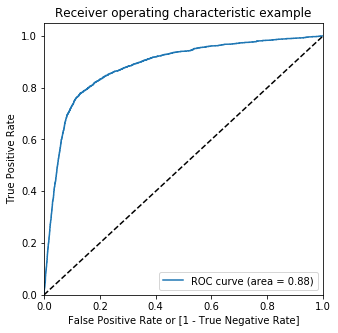

In [201]:
#Finding Optimal Cutoff Point
#Optimal cutoff probability is that prob where we get balanced sensitivity and specificity
draw_roc(y_train_pred_final_lr.Churn, y_train_pred_final_lr.Churn_Prob)

In [202]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final_lr[i]= y_train_pred_final_lr.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_lr.head()

,Churn,Churn_Prob,mobile_number,predicted_Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.723320,7000482695,1,1,1,1,1,1,1,1,1,0,0
1,0,0.193552,7001150548,0,1,1,0,0,0,0,0,0,0,0
2,0,0.200086,7000125732,0,1,1,1,0,0,0,0,0,0,0
3,0,0.245401,7001009452,0,1,1,1,0,0,0,0,0,0,0
4,0,0.085172,7001393390,0,1,0,0,0,0,0,0,0,0,0


In [203]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final_lr.Churn, y_train_pred_final_lr[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df.head()

,prob,accuracy,sensi,speci
0.0,0.0,0.500000,1.000000,0.000000
0.1,0.1,0.635962,0.973076,0.298847
0.2,0.2,0.711790,0.942508,0.481071
0.3,0.3,0.765569,0.915266,0.615872
0.4,0.4,0.797321,0.871259,0.723384


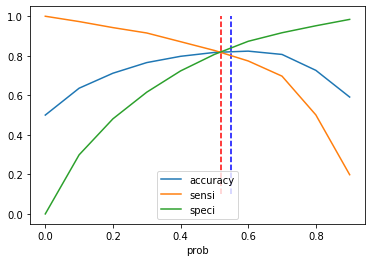

In [204]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x = 0.55, ymax=1, ymin=0.1, colors="b", linestyles="--")
plt.vlines(x = 0.52, ymax=1, ymin=0.1, colors="r", linestyles="--")
plt.show()

Despite 0.52 being the optimum point to take as cutoff probability, threshold = 0.45 gives us the best (most acceptable) combination for accuracy and sensitivity.

In [205]:
y_train_pred_final_lr['final_predicted'] = y_train_pred_final_lr.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)
y_train_pred_final_lr.head()

,Churn,Churn_Prob,mobile_number,predicted_Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.723320,7000482695,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.193552,7001150548,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.200086,7000125732,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.245401,7001009452,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.085172,7001393390,0,1,0,0,0,0,0,0,0,0,0,0


In [206]:
# Confusion matrix 
cm_lr_train_2 = metrics.confusion_matrix(y_train_pred_final_lr.Churn, y_train_pred_final_lr.final_predicted )

In [207]:
calculate_all_metrics(cm_lr_train_2)

Confusion matrix: 
[[16870  5081]
 [ 3224 18727]]

Sensitivity/Recall/True Positive Rate for the confusion matrix = 85.31%

Accuracy Score = 81.08%

Specificity for the confusion matrix = 76.85%

Precision for the confusion matrix = 78.66%

False Positive Rate for the confusion matrix = 23.15%


In [208]:
X_train_sm_2.columns

Index(['const', 'arpu_7', 'onnet_mou_6', 'offnet_mou_6', 'offnet_mou_8',
       'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_7', 'std_og_t2t_mou_8', 'og_others_8', 'total_og_mou_7',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_mou_6', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_amt_7', 'last_day_rch_amt_8', 'fb_user_8', 'aon',
       'avg_rech_amt_diff'],
      dtype='object')

In [209]:
X_train_sm_c = X_train_sm_2.copy(deep = True)
X_train_sm_c = X_train_sm_c.drop('const',axis=1)
col = X_train_sm_c.columns
X_test_sm = sm.add_constant(X_test[col])
y_test_pred_lr = res.predict(X_test_sm)
y_test_pred_lr[:10]

76438    0.005549
72869    0.153644
86053    0.125482
29093    0.321646
96385    0.946046
16713    0.322770
78343    0.531931
81467    0.891747
56584    0.317326
9517     0.111019
dtype: float64

In [210]:
y_test_pred_lr = y_test_pred_lr.values.reshape(-1)
y_test_pred_lr[:10]

array([0.00554906, 0.15364367, 0.12548224, 0.32164586, 0.94604585,
       0.32276983, 0.53193086, 0.89174718, 0.31732617, 0.11101888])

In [211]:
y_test_array = np.array(y_test.values)
y_test_array = y_test_array.reshape(-1)
y_test_array[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [212]:
y_test_pred_final_lr = pd.DataFrame({'Churn':y_test_array, 'Churn_Prob':y_test_pred_lr})
y_test_pred_final_lr['mobile_number'] = y_ind['mobile_number']
y_test_pred_final_lr.head()

,Churn,Churn_Prob,mobile_number
0,0,0.005549,7000482695
1,0,0.153644,7001150548
2,0,0.125482,7000125732
3,0,0.321646,7001009452
4,0,0.946046,7001393390


In [213]:
y_test_pred_final_lr['final_predicted'] = y_test_pred_final_lr.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)
y_test_pred_final_lr.head()

,Churn,Churn_Prob,mobile_number,final_predicted
0,0,0.005549,7000482695,0
1,0,0.153644,7001150548,0
2,0,0.125482,7000125732,0
3,0,0.321646,7001009452,0
4,0,0.946046,7001393390,1


In [214]:
cm_lr_test = metrics.confusion_matrix(y_test_pred_final_lr.Churn, y_test_pred_final_lr.final_predicted )
calculate_all_metrics(cm_lr_test)

Confusion matrix: 
[[4176 1263]
 [  75  482]]

Sensitivity/Recall/True Positive Rate for the confusion matrix = 86.54%

Accuracy Score = 77.69%

Specificity for the confusion matrix = 76.78%

Precision for the confusion matrix = 27.62%

False Positive Rate for the confusion matrix = 23.22%


Seeing as the model has performed well on the test data,

In [215]:
# The final summary of the model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                43902
Model:                            GLM   Df Residuals:                    43875
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19541.
Date:                Mon, 05 Apr 2021   Deviance:                       39083.
Time:                        22:08:29   Pearson chi2:                 5.42e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1841      0.016    -11.166      0.000      -0.216      -0.152
arpu_7                 0.0938      0.021      4.533      0.000       0.053       0.134
onnet_mou_6            0.1908      0.021      9.283      0.000       0.151       0.231
offnet_mou_6           0.1024      0.020      4.997      0.000       0.062       0.143
offnet_mou_8          -0.3341      0.025    -13.380      0.000      -0.383      -0.285
roam_ic_mou_7          0.1534      0.021      7.386      0.000       0.113       0.194
roam_og_mou_8          0.2996      0.019     15.910      0.000       0.263       0.337
loc_og_t2t_mou_8      -0.5247      0.030    -17.677      0.000      -0.583      -0.467
loc_og_t2m_mou_7      -0.2908      0.020    -14.415      0.000      -0.330      -0.251
std_og_t2t_mou_8      -0.4532      0.023    -20.122      0.000      -0.497      -0.409
og_others_8           -2.0432      0.697     -2.933      0.003      -3.409      -0.678
total_og_mou_7         0.2655      0.029      9.251      0.000       0.209       0.322
loc_ic_t2t_mou_6      -0.0600      0.016     -3.756      0.000      -0.091      -0.029
loc_ic_t2m_mou_6       0.3035      0.025     12.302      0.000       0.255       0.352
loc_ic_t2m_mou_8      -0.9010      0.034    -26.794      0.000      -0.967      -0.835
std_ic_t2m_mou_8      -0.1954      0.023     -8.517      0.000      -0.240      -0.150
std_ic_mou_6           0.0859      0.017      5.070      0.000       0.053       0.119
spl_ic_mou_8          -0.3952      0.021    -19.271      0.000      -0.435      -0.355
isd_ic_mou_6           0.1150      0.019      6.019      0.000       0.078       0.152
isd_ic_mou_8          -0.1091      0.023     -4.734      0.000      -0.154      -0.064
total_rech_num_7       0.2469      0.023     10.519      0.000       0.201       0.293
total_rech_num_8      -0.5391      0.027    -19.997      0.000      -0.592      -0.486
max_rech_amt_7         0.0841      0.016      5.252      0.000       0.053       0.115
last_day_rch_amt_8    -0.3976      0.020    -20.008      0.000      -0.437      -0.359
fb_user_8             -0.4214      0.014    -29.883      0.000      -0.449      -0.394
aon                   -0.3061      0.014    -22.480      0.000      -0.333      -0.279
avg_rech_amt_diff      0.3621      0.027     13.531      0.000       0.310       0.415
======================================================================================
"""

In [216]:
lr_coeffs = pd.DataFrame(res.params)
lr_coeffs.reset_index(inplace = True)
lr_coeffs.columns = ['Feature', 'coeff value']
top_10 = lr_coeffs.sort_values(['coeff value'], ascending = False).head(10)
top_10

,Feature,coeff value
26,avg_rech_amt_diff,0.362128
13,loc_ic_t2m_mou_6,0.303501
6,roam_og_mou_8,0.299636
11,total_og_mou_7,0.265495
20,total_rech_num_7,0.246946
2,onnet_mou_6,0.190837
5,roam_ic_mou_7,0.153411
18,isd_ic_mou_6,0.114957
3,offnet_mou_6,0.102401
1,arpu_7,0.093757


In [217]:
btm_10 = lr_coeffs.sort_values(['coeff value'], ascending = False).tail(10)
btm_10

,Feature,coeff value
25,aon,-0.306127
4,offnet_mou_8,-0.334077
17,spl_ic_mou_8,-0.395215
23,last_day_rch_amt_8,-0.397579
24,fb_user_8,-0.421403
9,std_og_t2t_mou_8,-0.453210
7,loc_og_t2t_mou_8,-0.524715
21,total_rech_num_8,-0.539124
14,loc_ic_t2m_mou_8,-0.900990
10,og_others_8,-2.043243


In [218]:
lr_coef = pd.concat([top_10, btm_10], axis=0, sort=False)
lr_coef['absolute coeff'] = abs(lr_coef['coeff value'])
lr_coef.sort_values(by = 'absolute coeff', ascending = False).head(10)

,Feature,coeff value,absolute coeff
10,og_others_8,-2.043243,2.043243
14,loc_ic_t2m_mou_8,-0.900990,0.900990
21,total_rech_num_8,-0.539124,0.539124
7,loc_og_t2t_mou_8,-0.524715,0.524715
9,std_og_t2t_mou_8,-0.453210,0.453210
24,fb_user_8,-0.421403,0.421403
23,last_day_rch_amt_8,-0.397579,0.397579
17,spl_ic_mou_8,-0.395215,0.395215
26,avg_rech_amt_diff,0.362128,0.362128
4,offnet_mou_8,-0.334077,0.334077


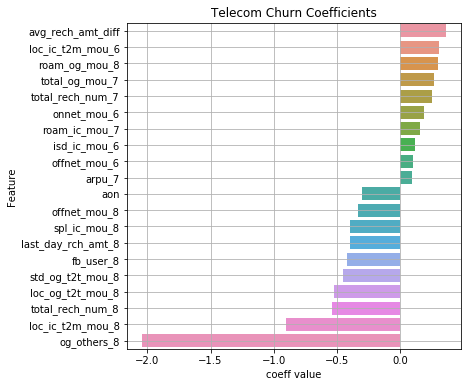

In [219]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
sns.barplot(x = 'coeff value', y = 'Feature', data = lr_coef)
plt.title("Telecom Churn Coefficients")
plt.grid()
plt.show()

From the above plot, the most impactful (top 10) factors contributing to churn behaviour are

1. og_others_8
2. loc_ic_t2m_mou_8
3. total_rech_num_8
4. loc_og_t2t_mou_8
5. std_og_t2t_mou_8
6. fb_user_8
7. last_day_rch_amt_8
8. spl_ic_mou_8
9. avg_rech_amt_diff
10. offnet_mou_8




## Decision Tree

In [220]:
# Fitting the decision tree with default hyperparameter max_depth = 3 
# Since Decision Trees need to be fed scaled data, the paramters passed would be from the original training dataset where data imbalance was handled
dt_1 = DecisionTreeClassifier(max_depth = 3)
dt_1.fit(X_train_c, y_train_c)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [221]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(X_train_c.columns[0:])
features

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7'

In [222]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_1, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 


In [223]:
# Defining a function for the image of a decision tree
def draw_decision_tree(dt,features):
    dot_data = io.StringIO()  
    export_graphviz(dt, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(Image(graph.create_png()))

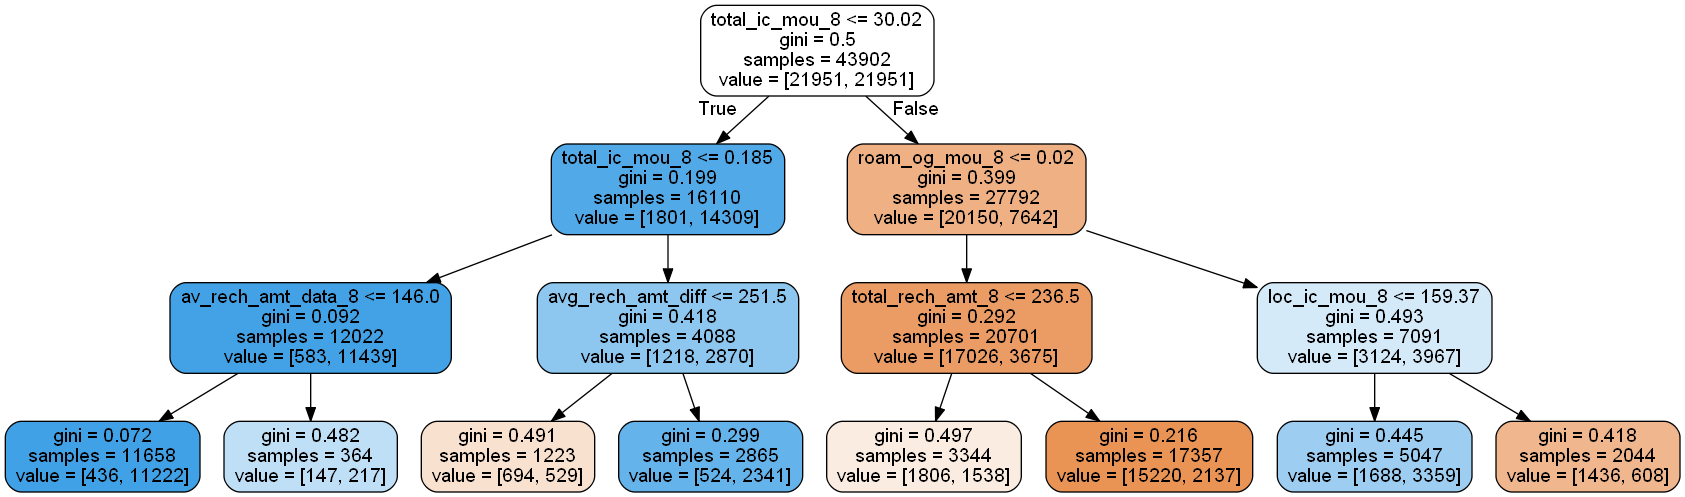

In [224]:
draw_decision_tree(dt_1,features)

## Prediction on Test Data

In [225]:
dt_y_test_pred1 = dt_1.predict(X_test_c)

In [226]:
#Classification Report
print(classification_report(y_test_c, dt_y_test_pred1))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      5439
           1       0.38      0.77      0.51       557

    accuracy                           0.86      5996
   macro avg       0.68      0.82      0.71      5996
weighted avg       0.92      0.86      0.88      5996



In [227]:
cm_dt = confusion_matrix(y_test_c, dt_y_test_pred1)
calculate_all_metrics(cm_dt)

Confusion matrix: 
[[4730  709]
 [ 126  431]]

Sensitivity/Recall/True Positive Rate for the confusion matrix = 77.38%

Accuracy Score = 86.07%

Specificity for the confusion matrix = 86.96%

Precision for the confusion matrix = 37.81%

False Positive Rate for the confusion matrix = 13.04%


Inferences: The Accuracy and Specificity are quite acceptable. Sensitivity (77.38%) is less than that of Logistic Regression.

In [228]:
# Tuning hyperparameters and creating another tree
dt_2 = DecisionTreeClassifier(max_depth=7,min_samples_split=200)
dt_2.fit(X_train_c, y_train_c)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

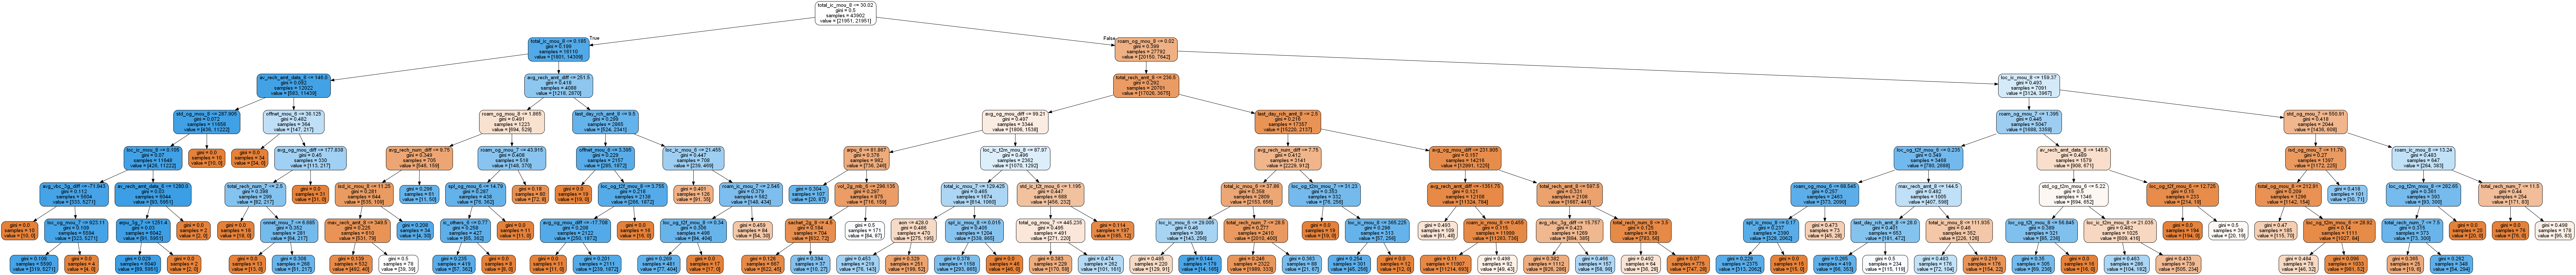

In [229]:
draw_decision_tree(dt_2,features)

In [230]:
dt_y_test_pred2 = dt_2.predict(X_test_c)

In [231]:
#Classification Report
print(classification_report(y_test_c, dt_y_test_pred2))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      5439
           1       0.41      0.80      0.54       557

    accuracy                           0.87      5996
   macro avg       0.69      0.84      0.73      5996
weighted avg       0.92      0.87      0.89      5996



In [232]:
cm_dt = confusion_matrix(y_test_c, dt_y_test_pred2)
calculate_all_metrics(cm_dt)

Confusion matrix: 
[[4792  647]
 [ 111  446]]

Sensitivity/Recall/True Positive Rate for the confusion matrix = 80.07%

Accuracy Score = 87.36%

Specificity for the confusion matrix = 88.1%

Precision for the confusion matrix = 40.81%

False Positive Rate for the confusion matrix = 11.9%


Inference - Gives balanced values for all metrics.

In [233]:
#Tuning Hyperparameters to inspect how confusion matrix changes 
dt_3 = DecisionTreeClassifier(max_depth=5,min_samples_split=150,min_samples_leaf=25,random_state=100,max_leaf_nodes=15,
                                 criterion='entropy')
dt_3.fit(X_train_c, y_train_c)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

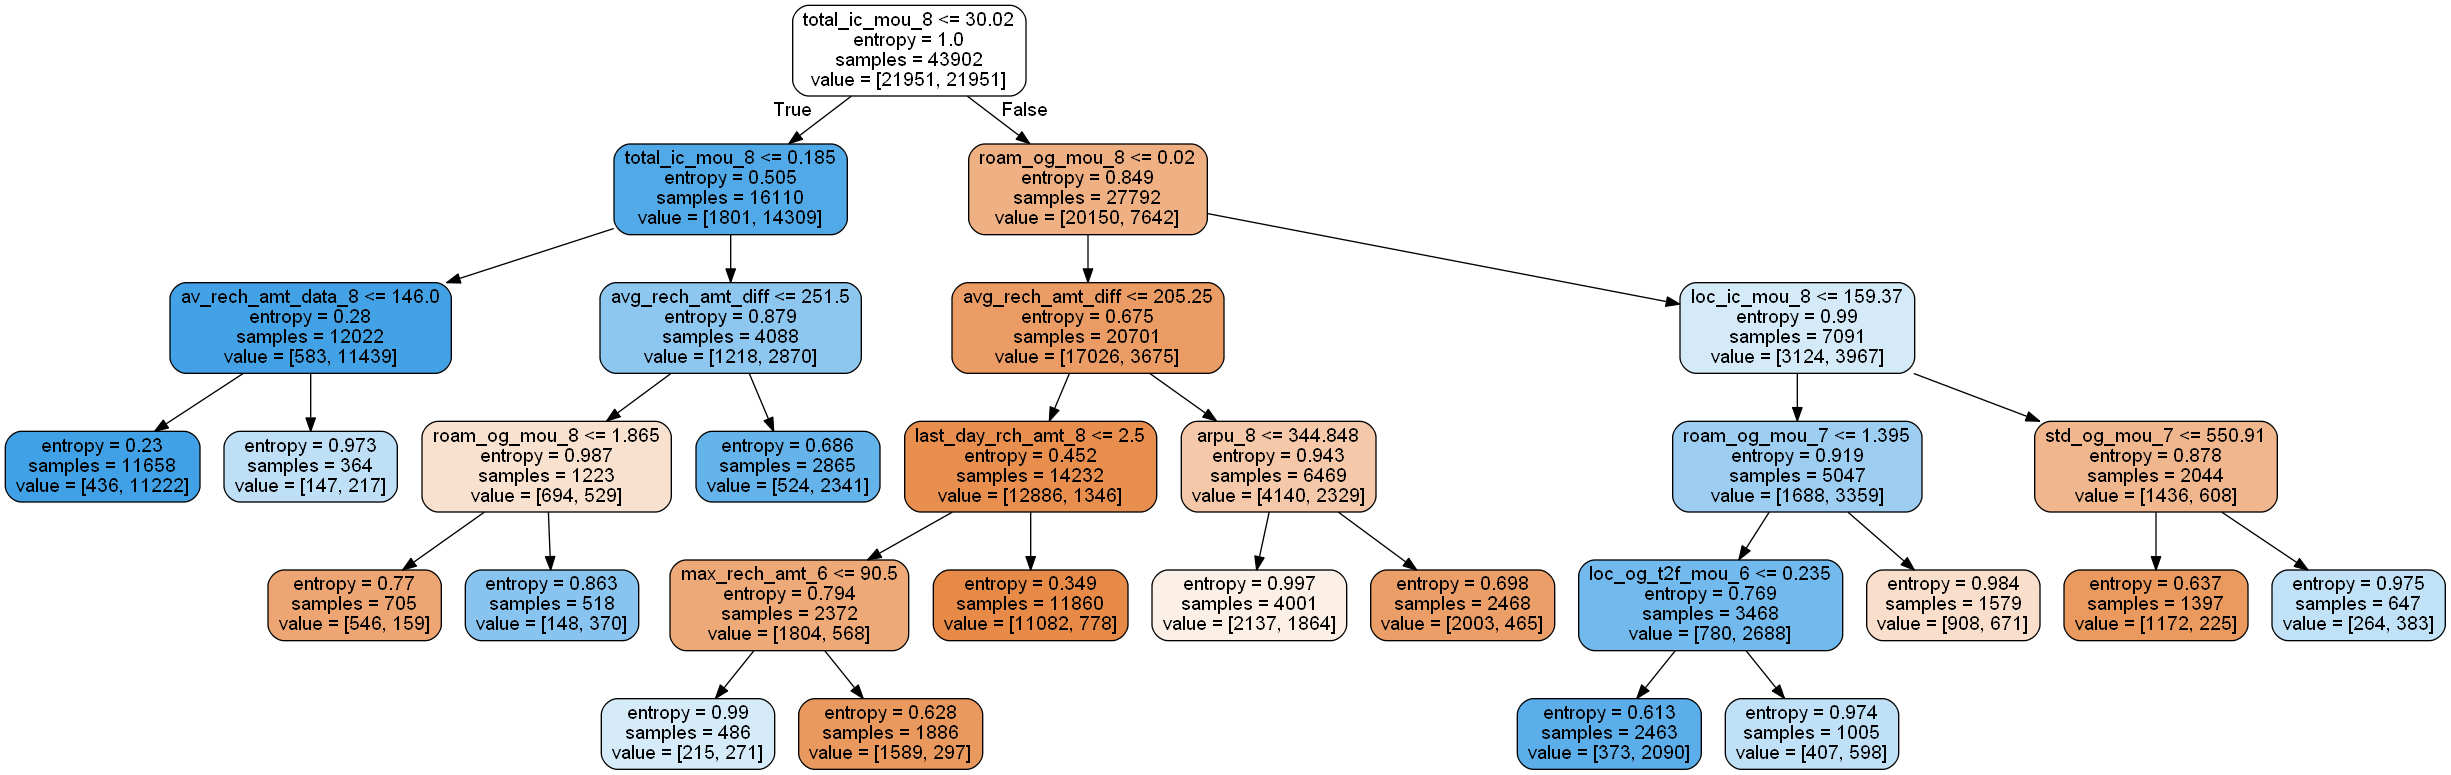

In [234]:
draw_decision_tree(dt_3,features)

In [235]:
dt_y_test_pred3 = dt_3.predict(X_test_c)

In [236]:
print(classification_report(y_test_c, dt_y_test_pred3))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92      5439
           1       0.40      0.79      0.53       557

    accuracy                           0.87      5996
   macro avg       0.69      0.83      0.73      5996
weighted avg       0.92      0.87      0.89      5996



In [237]:
cm_dt = confusion_matrix(y_test_c, dt_y_test_pred3)
calculate_all_metrics(cm_dt)

Confusion matrix: 
[[4776  663]
 [ 119  438]]

Sensitivity/Recall/True Positive Rate for the confusion matrix = 78.64%

Accuracy Score = 86.96%

Specificity for the confusion matrix = 87.81%

Precision for the confusion matrix = 39.78%

False Positive Rate for the confusion matrix = 12.19%


Inference : The metrics have slight worsened compared to the 2nd decision tree

In [238]:
# Defining a function to compare ROC curves for Decision Trees


def draw_roc_compare( actual, prob1, prob2, prob3):
    fpr1, tpr1, thresholds1 = metrics.roc_curve( actual, prob1, drop_intermediate = False )
    fpr2, tpr2, thresholds2 = metrics.roc_curve( actual, prob1, drop_intermediate = False )
    fpr3, tpr3, thresholds3 = metrics.roc_curve( actual, prob1, drop_intermediate = False )
    auc_score1 = metrics.roc_auc_score( actual, prob1)
    auc_score2 = metrics.roc_auc_score( actual, prob2)
    auc_score3 = metrics.roc_auc_score( actual, prob3)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr1, tpr1, label='Model 1 (area = %0.2f)' % auc_score1, color = "r" )
    plt.plot( fpr2, tpr2, label='Model 2 (area = %0.2f)' % auc_score2, color = "b" )
    plt.plot( fpr3, tpr3, label='Model 3 (area = %0.2f)' % auc_score3, color = "g" )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

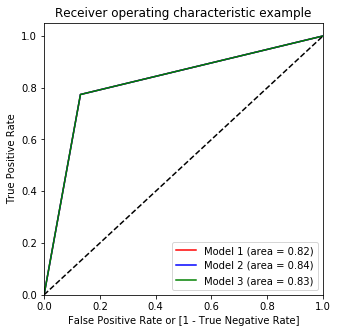

In [239]:
draw_roc_compare(pd.DataFrame(y_test_c)['churn'] , pd.DataFrame(dt_y_test_pred1). iloc[:, 0],pd.DataFrame(dt_y_test_pred2). iloc[:, 0],pd.DataFrame(dt_y_test_pred3). iloc[:, 0])

Model 2 (largest area) gives the best results in accordance with our inference from the confusion matrix. 

##### Final Inferences and suggestions: 

- 2nd Decision tree Model is showing the most accuracy. 
- If the total recharge made by the customer in August is more, then he is likely to retain with the network.  Offers can be made to the customers to hold them back, unlimited data. 
- Lesser the amount of recharge in the end of the  month obviously there are more chances of the customer churning.  Suggestion for discounts and coupons to reduce the amount of the recharge to be borne by the customer; Value added packs, ex. free night calling . 
- As the number of outgoing calls (both local and std) have increased from the good phase to action phase, it is observed that the likelihood of the customer churning is high. Adding more minutes to the customer who are proned to the network and giving benefits for staying loyal. 
